# Olist : Brazillian E-Commerce

# Business Problem Understanding

## Context
Olist adalah perusahaan e-commerce asal Brasil yang berfokus pada pemberdayaan usaha kecil dan menengah (UKM) untuk dapat berjualan secara online dengan lebih mudah. Mereka menyediakan platform dan serangkaian solusi teknologi (solusi perangkat lunak untuk bisnis, manajemen inventaris, pelacakan pesanan, dan lainnya)  yang memungkinkan para penjual untuk terhubung dengan berbagai marketplace besar.

Secara sederhana, Olist bertindak sebagai jembatan yang menghubungkan penjual dengan pasarnya. Penjual cukup mendaftarkan produknya di Olist, dan Olist akan membantu mendistribusikan dan menjual produk tersebut di berbagai kanal penjualan online.

## Problem Statement
[Studi](https://www.digitalcommerce360.com/2024/06/17/the-cost-of-slow-shipping-23-cart-abandonment-rate/) menunjukan bahwa 23% pembeli online meninggalkan keranjang mereka karena waktu pengiriman yang lambat
. [Di UK](https://www.sendcloud.com/en_uk/2-in-5-uk-shoppers-abandon-online-carts-over-delivery-concerns/) 40.6% pengguna layanan pernah membatalkan pembelian online selama setahun terakhir karena masalah pengirman barang. Hal tersebut menjadikan pengiriman menjadi salah satu poin penting yang perlu dipertimbangkan. Dengan bervariasinya dimensi produk, jenis produk, lokasi pengiriman, lokasi penerima memerlukan sumber daya yang berbeda-beda pada setiap prosesnya untuk mencapai kecepatan dan ketepatan yang sesuai (SOP/ standar) dengan kondisi sumber daya yang terbatas. Kendala tersebut, menimbulkan potensi keterlambatan pengiriman yang dimana dapat menurunkan tingkat retensi (penggunaan kembali) dan kepuasan pengguna layanan (service level).

## Stake Holder
`Tim Layanan Pelanggan & Marketing (Customer Service & Marketing)`: Dengan model prediksi, tim ini bisa mengantisipasi kekecewaan pengguna layanan sebelum terjadi. Mereka dapat mengubah pengalaman negatif menjadi kesempatan untuk menunjukkan layanan yang luar biasa.

## Goals
Dari permasalahan tersebut, Olist memerlukan sebuah tools atau model untuk membantu memberikan prediksi sebuah pesanan akan datang ontime atau terlambat. Dimana  dengan tools atau model tersebut, diharapkan meminimalisir kekecewaan pengguna layanan. `Tim Layanan Pelanggan & Marketing` dapat melakukan kontak/konfirmasi lebih awal ketika sebuah pesanan diprediksi oleh model akan terlambat. Ketika pesanan sudah diterima oleh pengguna layanan. Jika pesanan terlambat, maka `Tim Layanan Pelanggan & Marketing` dapat memberikan kompensasi seperti voucher untuk pembelian berikutnya dengan harapan meningkatkan kemungkinan pembelian selanjutnya dari pengguna layanan.


## Analytics Approach
Pendekatan yang dilakukan adalah melakukan analisa pada dataset yang ada untuk menemukan sejumlah pola/kecenderungan tertentu.

Dimana proses selanjutnya adalah membangun model untuk membantu perusahaan dalam membuat estimasi waktu pengiriman setiap paket.

## Metric Evaluation
Pada proses feature engineering akan dibuat kolom target yaitu pesanan sampai tepat waktu ke customer (1) dan pesanan telat (0).
Berikut merupakan cost of missclasification.

1. False Negative (FN). Prediksi tepat waktu (1), tapi sebenarnya terlambat (0). Dampak atau cost ke bisnis:
- Pelanggan yang berharap pesanannya akan datang tepat waktu namun malah telat akan menimbulkan kekecewaan pada pelanggan. Pengalaman buruk ini bisa menurunkan kepuasan pelanggan dan customer loyalti.
- dapat menimbulkan komplain, refund, atau biaya kompensasi.
- reputasi marketplace turun.
- dalam jangka panjang menimbulkan churn.

2. False Positive (FP). Prediksi pesanan terlambat (0), tapi sebenarnya tepat waktu (1).
- Sistem mungkin memberi notifikasi ke customer bahwa pesanan berpotensi telat, padahal nyatanya tepat waktu.
- Pelanggan mungkin sempat cemas, tapi akhirnya tetap puas karena barang datang sesuai janji.
- Alokasi tenaga kerja dan resource di sisi logistik akan terbuang untuk order yang dianggap akan terlambat.

Berdasarkan paparan di atas cost yang ditimbulkan False Positive dan False Negative sama sama punya cost yang harus dibayar jiak terjadi kesalahan prediksi.

Oleh karena itu akan digunakan matriks `F1` untuk kelas minoritas (0 = terlambat) supaya kejadian false negative dan false positive lebih sedikit.

# Import Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from math import radians, sin, cos, asin, sqrt
from scipy import stats

pd.set_option('display.max_columns', None)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix, classification_report, make_scorer , roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV, cross_validate,train_test_split

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from category_encoders import BinaryEncoder

from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

import shap

# **Load Dataset**

## Connect Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load All CSV

In [ ]:
project = "/content/drive/MyDrive/Final_Project_Alpha_Team"

In [ ]:
import os
import pandas as pd

paths = {
    "customers":  f"{project}/olist_customers_dataset.csv",
    "geolocation":f"{project}/olist_geolocation_dataset.csv",
    "order_items":f"{project}/olist_order_items_dataset.csv",
    "order_payments":f"{project}/olist_order_payments_dataset.csv",
    "order_reviews":f"{project}/olist_order_reviews_dataset.csv",
    "orders":     f"{project}/olist_orders_dataset.csv",
    "products":   f"{project}/olist_products_dataset.csv",
    "sellers":    f"{project}/olist_sellers_dataset.csv",
    "cat_translation": f"{project}/product_category_name_translation.csv",
}

In [ ]:
# LOADING DATASET TO DICTIONARY
dfs = {}

for name, path in paths.items():
    try:
        dfs[name] = pd.read_csv(path)
    except FileNotFoundError:
        print(f"File not found for {name}: {path}")

In [ ]:
# PEMISAHAN DATASET DARI DICTIONARY

# Loop melalui setiap item (nama dan DataFrame) di dalam dictionary 'dfs'
for name, data in dfs.items():
    print(f"==================== Memproses Dataset: {name.upper()} ====================")

    # 1. "Memisahkan" dataset ke variabel baru (opsional, tapi praktik yang baik)
    # Variabel 'data' sudah berisi DataFrame untuk iterasi saat ini.
    # Contoh: saat name='customers', maka 'data' adalah dfs['customers']
    current_df = data

    # 2. Lakukan operasi apa pun pada DataFrame yang sudah dipisahkan
    # Di sini kita akan menampilkan informasi dasar sebagai contoh

    print(f"✅ Dataset '{name}' berhasil diakses.")
    print(f"Bentuk (Shape) dari data: {current_df.shape}") # Menampilkan (jumlah baris, jumlah kolom)
    print("Lima baris pertama data:")
    print(display(current_df.head(2)))
    print("\n") # Memberi spasi untuk keterbacaan

==================== Memproses Dataset: CUSTOMERS ====================
✅ Dataset 'customers' berhasil diakses.
Bentuk (Shape) dari data: (99441, 5)
Lima baris pertama data:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


None


==================== Memproses Dataset: GEOLOCATION ====================
✅ Dataset 'geolocation' berhasil diakses.
Bentuk (Shape) dari data: (1000163, 5)
Lima baris pertama data:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


None


==================== Memproses Dataset: ORDER_ITEMS ====================
✅ Dataset 'order_items' berhasil diakses.
Bentuk (Shape) dari data: (112650, 7)
Lima baris pertama data:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


None


==================== Memproses Dataset: ORDER_PAYMENTS ====================
✅ Dataset 'order_payments' berhasil diakses.
Bentuk (Shape) dari data: (103886, 5)
Lima baris pertama data:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


None


==================== Memproses Dataset: ORDER_REVIEWS ====================
✅ Dataset 'order_reviews' berhasil diakses.
Bentuk (Shape) dari data: (99224, 7)
Lima baris pertama data:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


None


==================== Memproses Dataset: ORDERS ====================
✅ Dataset 'orders' berhasil diakses.
Bentuk (Shape) dari data: (99441, 8)
Lima baris pertama data:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


None


==================== Memproses Dataset: PRODUCTS ====================
✅ Dataset 'products' berhasil diakses.
Bentuk (Shape) dari data: (32951, 9)
Lima baris pertama data:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


None


==================== Memproses Dataset: SELLERS ====================
✅ Dataset 'sellers' berhasil diakses.
Bentuk (Shape) dari data: (3095, 4)
Lima baris pertama data:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


None


==================== Memproses Dataset: CAT_TRANSLATION ====================
✅ Dataset 'cat_translation' berhasil diakses.
Bentuk (Shape) dari data: (71, 2)
Lima baris pertama data:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


None




In [ ]:
# MASTER PRODUK: tambah kategori EN
cat = dfs['cat_translation'].drop_duplicates('product_category_name')
products_en = dfs['products'].merge(
    cat,
    on='product_category_name',
    how='left',
    validate='m:1'  # pastikan m:1 (product ke satu terjemahan)
)

print(products_en.shape)
products_en.head()

(32951, 10)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [ ]:
# Loop melalui setiap dataset di dalam dictionary 'dfs'
for name, df in dfs.items():
    print(f"================== PROFILING DATASET: {name.upper()} ==================")

    # 1.1 Cek Tipe Data & Nilai Kosong (Missing Values)
    print("\n--- 1.1 Tipe Data & Nilai Kosong ---")
    # df.info() sudah mencakup kedua informasi ini, jadi kita bisa tampilkan langsung
    print("DataFrame Info:")
    df.info()

    # Untuk ringkasan nilai kosong yang lebih ringkas
    print("\nRingkasan Nilai Kosong (per kolom):")
    # Tampilkan hanya kolom yang memiliki nilai kosong agar tidak terlalu panjang
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])


    # 1.2 Lihat Statistik Dasar
    print("\n--- 1.2 Statistik Dasar ---")
    # Menggunakan include='all' agar kolom non-numerik (object/category) juga dianalisis
    print(df.describe(include='all'))


    # 1.3 Hitung Duplikasi
    print("\n--- 1.3 Pengecekan Duplikasi ---")
    duplicate_count = df.duplicated().sum()
    if duplicate_count > 0:
        print(f"⚠️ Ditemukan {duplicate_count} baris data duplikat.")
    else:
        print("✅ Tidak ditemukan data duplikat.")

    # Memberi garis pemisah antar dataset
    print("\n" + "="*70 + "\n\n")

================== PROFILING DATASET: CUSTOMERS ==================

--- 1.1 Tipe Data & Nilai Kosong ---
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Ringkasan Nilai Kosong (per kolom):
Series([], dtype: int64)

--- 1.2 Statistik Dasar ---
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     274fa6071e

- Pre-Cleaning data Keys (Order_Id, Customer_Id, Product_Id, Seller_ID, Zip_Code_Prefix)
- Format keys sudah sesuai, tidak memerlukan cleaning lebih dahulu, proses akan dilanjutkan ke merge data set terlebih dahulu

# Data Understanding

Dataset ini merupakan dataset pesanan di market place olist store. Jumlah data yang tersedia adalah data 100 ribu order dari tahun 2016 sampai tahun 2018. Berikut adalah fitur-fitur yang digunakan project ini.

|Kolom |Deskripsi|
|-----|:-----|
|order_id|pengenal unik pesanan|
|customer_id|key dataset customer. Setiap pesanan punya customer_id yang unik|
|order_status|Status pesanan. (delivered, shipped, etc)|
|order_purchase_timestamp|timestamp pembelian|
|order_approved_at|timestamp approval pembayaran|
|order_delivered_carrier_date|timestamp saat pesanan diserahkan ke partner logistik|
|order_delivered_customer_date|tanggal pesanan sampai ke pelanggan|
|order_delivered_delivery_date|estimasi tanggal pesanan sampai|
|customer_zip_code_prefix|lima digit pertama kode pos pelanggan|
|customer_city|nama kota pelanggan|
|customer_state|negara bagian pelanggan|
|seller_zip_code_prefix|lima digit pertama kode pos penjual|
|seller_city|kota penjual|
|seller_state|negara bagian penjual|
|review_score|skor review|
|product_category_name|nama kategori produk dalam bahasa portugis|
|product_category_name_english|nama kategori produk dalam bahasa inggris|
|price|harga per item|
|freight_value|har pengiriman barang|
|product_weight_g|berat produk dalam gram|
|product_lenght_cm|panjang produk dalam cm|
|product_height_cm|tinggi produk dalam cm|
|product_width_cm|lebar produk dalalm cm|

## Cross Cek Keys

### CrossCek Zip_Code Prefix

In [ ]:
# 1. Ambil daftar kode pos unik dari setiap dataset
customer_zips = set(dfs['customers']['customer_zip_code_prefix'].unique())
seller_zips = set(dfs['sellers']['seller_zip_code_prefix'].unique())
geo_zips = set(dfs['geolocation']['geolocation_zip_code_prefix'].unique())

print(f"Jumlah kode pos unik di customers: {len(customer_zips)}")
print(f"Jumlah kode pos unik di sellers: {len(seller_zips)}")
print(f"Jumlah kode pos unik di geolocation: {len(geo_zips)}\n")


# 2. Periksa kecocokan [Customer] vs. [Geolocation]
print("--- Pengecekan [Customer] vs. [Geolocation] ---")
if customer_zips.issubset(geo_zips):
    print("✅ Semua kode pos pelanggan ditemukan di dataset geolokasi.")
else:
    # Cari tahu KODE POS unik mana saja yang hilang
    missing_in_geo_for_cust = customer_zips - geo_zips

    # Hitung berapa BANYAK BARIS yang menggunakan kode pos yang hilang tersebut
    unmatched_customer_rows = dfs['customers']['customer_zip_code_prefix'].isin(missing_in_geo_for_cust).sum()

    print(f"⚠️ Ditemukan {len(missing_in_geo_for_cust)} kode pos unik pelanggan yang tidak ada di geolokasi.")
    print(f"📊 Jumlah baris pelanggan yang terdampak: {unmatched_customer_rows} baris.")


# 3. Periksa kecocokan [Seller] vs. [Geolocation]
print("\n--- Pengecekan [Seller] vs. [Geolocation] ---")
if seller_zips.issubset(geo_zips):
    print("✅ Semua kode pos penjual ditemukan di dataset geolokasi.")
else:
    # Cari tahu KODE POS unik mana saja yang hilang
    missing_in_geo_for_seller = seller_zips - geo_zips

    # Hitung berapa BANYAK BARIS yang menggunakan kode pos yang hilang tersebut
    unmatched_seller_rows = dfs['sellers']['seller_zip_code_prefix'].isin(missing_in_geo_for_seller).sum()

    print(f"⚠️ Ditemukan {len(missing_in_geo_for_seller)} kode pos unik penjual yang tidak ada di geolokasi.")
    print(f"📊 Jumlah baris penjual yang terdampak: {unmatched_seller_rows} baris.")

Jumlah kode pos unik di customers: 14994
Jumlah kode pos unik di sellers: 2246
Jumlah kode pos unik di geolocation: 19015

--- Pengecekan [Customer] vs. [Geolocation] ---
⚠️ Ditemukan 157 kode pos unik pelanggan yang tidak ada di geolokasi.
📊 Jumlah baris pelanggan yang terdampak: 278 baris.

--- Pengecekan [Seller] vs. [Geolocation] ---
⚠️ Ditemukan 7 kode pos unik penjual yang tidak ada di geolokasi.
📊 Jumlah baris penjual yang terdampak: 7 baris.


- Data ini bisa dipertimbangkan dihapus, dengan kondisi tidak ada menggunakan data terkait geolocation

### Cross Cek Order_ID

In [ ]:
# 1. Ambil daftar order_id unik dari setiap dataset dan ubah menjadi set
# Set adalah struktur data yang paling efisien untuk perbandingan seperti ini
orders_ids = set(dfs['orders']['order_id'].unique())
payments_ids = set(dfs['order_payments']['order_id'].unique())
items_ids = set(dfs['order_items']['order_id'].unique())
reviews_ids = set(dfs['order_reviews']['order_id'].unique())

print("--- Jumlah Order ID Unik per Dataset ---")
print(f"Dataset Orders: {len(orders_ids)}")
print(f"Dataset Payments: {len(payments_ids)}")
print(f"Dataset Items: {len(items_ids)}")
print(f"Dataset Reviews: {len(reviews_ids)}")
print("\n" + "="*50 + "\n")


# 2. Pengecekan Integritas: Apakah semua ID di tabel detail ada di tabel utama 'orders'?
print("--- Pengecekan Integritas (Detail -> Utama) ---")

# Daftar tabel detail untuk diperiksa
detail_tables = {
    "Payments": payments_ids,
    "Items": items_ids,
    "Reviews": reviews_ids
}

for name, detail_ids in detail_tables.items():
    if detail_ids.issubset(orders_ids):
        print(f"✅ [OK] Semua order_id di '{name}' valid dan ada di dataset 'orders'.")
    else:
        # Cari tahu ID mana yang "yatim" (orphan)
        orphan_ids = detail_ids - orders_ids
        print(f"⚠️ [ERROR] Ditemukan {len(orphan_ids)} order_id di '{name}' yang TIDAK ada di dataset 'orders'.")


# 3. Pengecekan Kelengkapan: Apakah semua ID di 'orders' ada di tabel detail?
print("\n--- Pengecekan Kelengkapan (Utama -> Detail) ---")

# Cek orders yang tidak punya data pembayaran
missing_in_payments = orders_ids - payments_ids
if not missing_in_payments:
     print("✅ [Lengkap] Semua order di 'orders' memiliki data di 'payments'.")
else:
    print(f"ℹ️ [Info] Ada {len(missing_in_payments)} order di 'orders' yang tidak memiliki data di 'payments'.")

# Cek orders yang tidak punya data item
missing_in_items = orders_ids - items_ids
if not missing_in_items:
    print("✅ [Lengkap] Semua order di 'orders' memiliki data di 'items'.")
else:
    print(f"ℹ️ [Info] Ada {len(missing_in_items)} order di 'orders' yang tidak memiliki data di 'items'.")

# Cek orders yang tidak punya data review
missing_in_reviews = orders_ids - reviews_ids
if not missing_in_reviews:
    print("✅ [Lengkap] Semua order di 'orders' memiliki data di 'reviews'.")
else:
    print(f"ℹ️ [Info] Ada {len(missing_in_reviews)} order di 'orders' yang tidak memiliki data di 'reviews'.")

--- Jumlah Order ID Unik per Dataset ---
Dataset Orders: 99441
Dataset Payments: 99440
Dataset Items: 98666
Dataset Reviews: 98673


--- Pengecekan Integritas (Detail -> Utama) ---
✅ [OK] Semua order_id di 'Payments' valid dan ada di dataset 'orders'.
✅ [OK] Semua order_id di 'Items' valid dan ada di dataset 'orders'.
✅ [OK] Semua order_id di 'Reviews' valid dan ada di dataset 'orders'.

--- Pengecekan Kelengkapan (Utama -> Detail) ---
ℹ️ [Info] Ada 1 order di 'orders' yang tidak memiliki data di 'payments'.
ℹ️ [Info] Ada 775 order di 'orders' yang tidak memiliki data di 'items'.
ℹ️ [Info] Ada 768 order di 'orders' yang tidak memiliki data di 'reviews'.


### Cross Cek Customer_ID

In [ ]:
# 1. Ambil daftar customer_id unik dari setiap dataset dan ubah menjadi set
orders_customer_ids = set(dfs['orders']['customer_id'].unique())
customers_ids = set(dfs['customers']['customer_id'].unique())

print("--- Jumlah Customer ID Unik per Dataset ---")
print(f"Dataset Orders: {len(orders_customer_ids)}")
print(f"Dataset Customers: {len(customers_ids)}")
print("\n" + "="*50 + "\n")


# 2. Pengecekan Integritas: Apakah semua ID di 'orders' ada di 'customers'?
# Ini adalah pengecekan yang paling krusial.
print("--- Pengecekan [Orders] -> [Customers] ---")
if orders_customer_ids.issubset(customers_ids):
    print("✅ [OK] Semua customer_id di 'orders' valid dan ditemukan di dataset 'customers'.")
else:
    # Cari tahu ID mana yang "yatim" (orphan) atau tidak memiliki data pelanggan
    orphan_ids = orders_customer_ids - customers_ids
    print(f"⚠️ [ERROR] Ditemukan {len(orphan_ids)} customer_id di 'orders' yang TIDAK ada di dataset 'customers'.")


# 3. Pengecekan Balik: Apakah semua ID di 'customers' memiliki pesanan di 'orders'?
# Idealnya, setiap data pelanggan harus terhubung ke setidaknya satu pesanan.
print("\n--- Pengecekan [Customers] -> [Orders] ---")
if customers_ids.issubset(orders_customer_ids):
    print("✅ [OK] Semua customer_id di 'customers' memiliki data pesanan di dataset 'orders'.")
else:
    # Cari tahu data customer mana yang tidak terhubung ke pesanan manapun
    unlinked_customers = customers_ids - orders_customer_ids
    print(f"⚠️ [ERROR] Ditemukan {len(unlinked_customers)} customer_id di 'customers' yang TIDAK terhubung ke pesanan manapun.")

--- Jumlah Customer ID Unik per Dataset ---
Dataset Orders: 99441
Dataset Customers: 99441


--- Pengecekan [Orders] -> [Customers] ---
✅ [OK] Semua customer_id di 'orders' valid dan ditemukan di dataset 'customers'.

--- Pengecekan [Customers] -> [Orders] ---
✅ [OK] Semua customer_id di 'customers' memiliki data pesanan di dataset 'orders'.


### Cross Cek Product_ID

In [ ]:
# 1. Ambil daftar product_id unik dari setiap dataset dan ubah menjadi set
items_product_ids = set(dfs['order_items']['product_id'].unique())
products_ids = set(dfs['products']['product_id'].unique())

print("--- Jumlah Product ID Unik per Dataset ---")
print(f"Dataset Order Items: {len(items_product_ids)}")
print(f"Dataset Products: {len(products_ids)}")
print("\n" + "="*50 + "\n")


# 2. Pengecekan Integritas: Apakah semua produk yang terjual ada di daftar produk?
print("--- Pengecekan [Order Items] -> [Products] ---")
if items_product_ids.issubset(products_ids):
    print("✅ [OK] Semua product_id di 'order_items' valid dan ditemukan di dataset 'products'.")
else:
    # Cari tahu produk mana yang terjual tapi tidak ada di daftar produk
    unknown_products = items_product_ids - products_ids
    print(f"⚠️ [ERROR] Ditemukan {len(unknown_products)} product_id di 'order_items' yang TIDAK ada di dataset 'products'.")


# 3. Pengecekan Balik: Apakah semua produk di katalog pernah terjual?
print("\n--- Pengecekan [Products] -> [Order Items] ---")
if products_ids.issubset(items_product_ids):
    print("✅ [Lengkap] Semua produk di 'products' pernah terjual setidaknya satu kali.")
else:
    # Cari tahu produk mana yang belum pernah terjual
    unsold_products = products_ids - items_product_ids
    print(f"ℹ️ [Info] Ada {len(unsold_products)} produk di 'products' yang belum pernah terjual.")

--- Jumlah Product ID Unik per Dataset ---
Dataset Order Items: 32951
Dataset Products: 32951


--- Pengecekan [Order Items] -> [Products] ---
✅ [OK] Semua product_id di 'order_items' valid dan ditemukan di dataset 'products'.

--- Pengecekan [Products] -> [Order Items] ---
✅ [Lengkap] Semua produk di 'products' pernah terjual setidaknya satu kali.


### Cross Cek Seller_ID

In [ ]:
# 1. Ambil daftar seller_id unik dari setiap dataset dan ubah menjadi set
items_seller_ids = set(dfs['order_items']['seller_id'].unique())
sellers_ids = set(dfs['sellers']['seller_id'].unique())

print("--- Jumlah Seller ID Unik per Dataset ---")
print(f"Dataset Order Items: {len(items_seller_ids)}")
print(f"Dataset Sellers: {len(sellers_ids)}")
print("\n" + "="*50 + "\n")


# 2. Pengecekan Integritas: Apakah semua penjual di 'order_items' ada di daftar 'sellers'?
print("--- Pengecekan [Order Items] -> [Sellers] ---")
if items_seller_ids.issubset(sellers_ids):
    print("✅ [OK] Semua seller_id di 'order_items' valid dan ditemukan di dataset 'sellers'.")
else:
    # Cari tahu ID penjual mana yang tidak terdaftar
    unknown_sellers = items_seller_ids - sellers_ids
    print(f"⚠️ [ERROR] Ditemukan {len(unknown_sellers)} seller_id di 'order_items' yang TIDAK ada di dataset 'sellers'.")


# 3. Pengecekan Balik: Apakah semua penjual yang terdaftar pernah melakukan penjualan?
print("\n--- Pengecekan [Sellers] -> [Order Items] ---")
if sellers_ids.issubset(items_seller_ids):
    print("✅ [Lengkap] Semua penjual di 'sellers' pernah melakukan penjualan setidaknya satu kali.")
else:
    # Cari tahu penjual mana yang belum pernah menjual apapun
    inactive_sellers = sellers_ids - items_seller_ids
    print(f"ℹ️ [Info] Ada {len(inactive_sellers)} penjual di 'sellers' yang belum pernah melakukan penjualan.")

--- Jumlah Seller ID Unik per Dataset ---
Dataset Order Items: 3095
Dataset Sellers: 3095


--- Pengecekan [Order Items] -> [Sellers] ---
✅ [OK] Semua seller_id di 'order_items' valid dan ditemukan di dataset 'sellers'.

--- Pengecekan [Sellers] -> [Order Items] ---
✅ [Lengkap] Semua penjual di 'sellers' pernah melakukan penjualan setidaknya satu kali.


## Merge Dataset & Feature Enginering

Proses pembersihan Geolocation_dataset sebelum merge dengan dataset lainnya

In [ ]:
geo = dfs['geolocation'] # Extract dataframe geolocation
geo = geo[~geo['geolocation_zip_code_prefix'].duplicated()] #Remove duplicate dataframe geolocation

1. Pembuatan dataset df_by_item dengan merge ke dataset lainnya tanpa melakukan penghapusan duplikat pada order_id.

In [ ]:
# df_by_item merupakan df yang dibuat dengan struktur per item
# Memulai dengan DataFrame 'orders' sebagai fondasi
# Kita akan menggunakan copy() agar DataFrame asli di dalam 'dfs' tidak berubah
df_by_item = dfs['orders'].copy()

print(f"Bentuk awal (orders): {df_by_item.shape}")

# Langkah 1: Gabungkan dengan data transaksi utama (items, payments, reviews)
df_by_item = pd.merge(df_by_item, dfs['order_items'], on='order_id', how='left')
df_by_item = pd.merge(df_by_item, dfs['order_payments'], on='order_id', how='left')
df_by_item = pd.merge(df_by_item, dfs['order_reviews'], on='order_id', how='left')

print(f"Setelah join data transaksi: {df_by_item.shape}")

# Langkah 2: Gabungkan dengan data pelanggan
df_by_item = pd.merge(df_by_item, dfs['customers'], on='customer_id', how='left')

print(f"Setelah join data customers: {df_by_item.shape}")

# Langkah 3: Gabungkan dengan data detail (products, sellers)
df_by_item = pd.merge(df_by_item, dfs['products'], on='product_id', how='left')
df_by_item = pd.merge(df_by_item, dfs['sellers'], on='seller_id', how='left')

print(f"Setelah join data products & sellers: {df_by_item.shape}")

# Langkah 4 (Opsional tapi direkomendasikan): Terjemahkan nama kategori produk
# Menggabungkan dengan tabel terjemahan untuk mendapatkan nama kategori dalam bahasa Inggris
df_by_item = pd.merge(
    df_by_item,
    dfs['cat_translation'],
    on='product_category_name',
    how='left'
)

# Langkah 5: Gabungkan koordinat seler
df_by_item = df_by_item.merge(geo,
                              left_on="seller_zip_code_prefix",
                             right_on="geolocation_zip_code_prefix",
                            how="left")

# Langkah 6: Gabungkan koordinat customer
df_by_item = df_by_item.merge(geo,
                            left_on="customer_zip_code_prefix",
                            right_on="geolocation_zip_code_prefix",
                            how="left",
                            suffixes = ("_seller", "_customer"))

print(f"Bentuk akhir setelah semua digabungkan: {df_by_item.shape}")

# Verifikasi hasil akhir
print("\n--- Hasil Akhir Penggabungan ---")
print(f"Total baris: {df_by_item.shape[0]}, Total kolom: {df_by_item.shape[1]}")
print("Contoh 5 baris pertama dari data gabungan:")
print(display(df_by_item.head()))

Bentuk awal (orders): (99441, 8)
Setelah join data transaksi: (119143, 24)
Setelah join data customers: (119143, 28)
Setelah join data products & sellers: (119143, 39)
Bentuk akhir setelah semua digabungkan: (119143, 50)

--- Hasil Akhir Penggabungan ---
Total baris: 119143, Total kolom: 50
Contoh 5 baris pertama dari data gabungan:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller,geolocation_zip_code_prefix_customer,geolocation_lat_customer,geolocation_lng_customer,geolocation_city_customer,geolocation_state_customer
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,9350.0,-23.680114,-46.452454,maua,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,9350.0,-23.680114,-46.452454,maua,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,9350.0,-23.680114,-46.452454,maua,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery,31570.0,-19.810119,-43.984727,belo horizonte,MG,47813.0,-12.169860,-44.988369,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,3a653a41f6f9fc3d2a1

None


Pembuatan data jarak pengiriman setiap order - Feature Enginering
- Dibuat karena adanya keterbatasan sarana pengiriman dalam menempuh jarak

In [ ]:
# Haversine distance (km)
def haversine_km(lat1, lon1, lat2, lon2):
    R = 6371.0088  # km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2.0)**2
    return 2 * R * np.arcsin(np.sqrt(a))

# HITUNG JARAK per item
df_by_item['distance_km'] = haversine_km(
    df_by_item['geolocation_lat_seller'],    # kolom hasil merge geo untuk seller
    df_by_item['geolocation_lng_seller'],
    df_by_item['geolocation_lat_customer'],  # kolom hasil merge geo untuk customer
    df_by_item['geolocation_lng_customer']
)

# (opsional) kalau mau bersih dari NaN koordinat
# df_by_item = df_by_item.dropna(subset=[
#     'geolocation_lat_seller','geolocation_lng_seller',
#     'geolocation_lat_customer','geolocation_lng_customer'
# ])
print('distance_km added. shape:', df_by_item.shape)
display(df_by_item[['order_id','order_item_id','distance_km']].head())


distance_km added. shape: (119143, 51)


,order_id,order_item_id,distance_km
0,e481f51cbdc54678b7cc49136f2d6af7,1.0,18.063862
1,e481f51cbdc54678b7cc49136f2d6af7,1.0,18.063862
2,e481f51cbdc54678b7cc49136f2d6af7,1.0,18.063862
3,53cdb2fc8bc7dce0b6741e2150273451,1.0,856.293763
4,47770eb9100c2d0c44946d9cf07ec65d,1.0,514.131043


Tahap persiapan aggregasi data, menghilangkan duplikat data yang tidak tepat dalam proses aggregasi

In [ ]:
# PREP: Agregasi per order (hindari kartesius) ===

# Calculate volume per item and add it to df_by_item
# Ensure product dimensions are available by merging with products first if not already there
if 'product_volume_cm3' not in df_by_item.columns:
     # Assuming product dimensions are in dfs['products'] and already merged into df_by_item
     # (which they were in cell WXgLs5ChX0uF)
     # Recalculate volume if needed, or ensure it's there
     df_by_item['product_volume_cm3'] = df_by_item['product_length_cm'] * df_by_item['product_height_cm'] * df_by_item['product_width_cm']


# Items per order - Keep original aggregation for numerical item features
items_agg = (
    df_by_item # Use df_by_item which now should have product_volume_cm3
      .groupby('order_id', as_index=False)
      .agg(
          jumlah_item    = ('order_item_id', 'count'),
          subtotal_price = ('price', 'sum'),
          total_freight  = ('freight_value', 'sum'),
          unique_sellers = ('seller_id', 'nunique'),
          # Add total volume and weight aggregation at order level here as well
          total_volume_cm3 = ('product_volume_cm3', 'sum'),
          total_weight_g = ('product_weight_g', 'sum')
      )
)

# Payments per order
payments_agg = (
    dfs['order_payments']
      .groupby('order_id', as_index=False)
      .agg(
          total_belanja   = ('payment_value', 'sum'),
          jumlah_cicilan  = ('payment_installments', 'sum'),
          # gabungkan tipe pembayaran unik agar tetap 1 baris per order
          payment_methods = ('payment_type', lambda s: ','.join(sorted(s.dropna().astype(str).unique())))
      )
)

# Reviews per order
# (pakai review_id untuk hitung banyak review; kalau tidak ada, ganti dengan 'review_answer_timestamp')
reviews_agg = (
    dfs['order_reviews']
      .groupby('order_id', as_index=False)
      .agg(
          skor_review = ('review_score', 'mean'),
          n_review    = ('review_id', 'count')
      )
)

# Rata-rata jarak per order (setelah langkah Nomor 2 menambah df_by_item['distance_km'])
# Ini sudah dihitung di df_by_item dan diagregasi rata-rata per order, jadi bisa langsung pakai
order_distance = (
    df_by_item # Menggunakan df_by_item yang sudah ada kolom distance_km
      .groupby('order_id', as_index=False)['distance_km']
      .mean()
      .rename(columns={'distance_km':'avg_distance_km'})
)

# BARU: Informasi Penjual dan Produk dari ITEM PERTAMA per Order
# Urutkan df_by_item berdasarkan order_id dan order_item_id untuk memastikan item pertama benar
df_by_item_sorted = df_by_item.sort_values(by=['order_id', 'order_item_id'])

# Ambil baris pertama untuk setiap order_id
first_item_per_order = df_by_item_sorted.groupby('order_id', as_index=False).first()

# Pilih kolom seller dan product yang relevan dari item pertama
# Note: seller_zip_code_prefix, seller_city, seller_state should be from the seller associated with the item
# product_category_name, product_category_name_english should be from the product associated with the item
seller_product_agg = first_item_per_order[[
    'order_id',
    'seller_zip_code_prefix', 'seller_city', 'seller_state', # Seller info from item
    'product_id', 'product_category_name', 'product_category_name_english', # Product info from item
    'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_volume_cm3' # Product dimensions/volume from item
]].rename(columns={
    'seller_zip_code_prefix': 'first_item_seller_zip_code_prefix',
    'seller_city': 'first_item_seller_city',
    'seller_state': 'first_item_seller_state',
    'product_id': 'first_item_product_id',
    'product_category_name': 'first_item_product_category_name',
    'product_category_name_english': 'first_item_product_category_name_english',
    'product_weight_g': 'first_item_product_weight_g',
    'product_length_cm': 'first_item_product_length_cm',
    'product_height_cm': 'first_item_product_height_cm',
    'product_width_cm': 'first_item_product_width_cm',
    'product_volume_cm3': 'first_item_product_volume_cm3'
})


# Cek cepat
print('items_agg:', items_agg.shape)
print('payments_agg:', payments_agg.shape)
print('reviews_agg:', reviews_agg.shape)
print('order_distance:', order_distance.shape)
print('seller_product_agg (first item):', seller_product_agg.shape)

# display(items_agg.head(), payments_agg.head(), reviews_agg.head(), order_distance.head(), seller_product_agg.head())

items_agg: (99441, 7)
payments_agg: (99440, 4)
reviews_agg: (98673, 3)
order_distance: (99441, 2)
seller_product_agg (first item): (99441, 12)


Proses aggregasi data untuk menghilangkan duplikat data

In [ ]:
# df_by_order via JOIN (aman dari kartesius)
# Mulai dengan data orders + customer
df_by_order = (
    dfs['orders'][[
        'order_id','customer_id','order_status',
        'order_purchase_timestamp',
        'order_approved_at',
        'order_delivered_carrier_date',
        'order_delivered_customer_date',
        'order_estimated_delivery_date'
    ]]
    .merge(
        dfs['customers'][['customer_id','customer_unique_id','customer_city','customer_state']],
        on='customer_id', how='left'
    )
    # Merge dengan agregasi item, payment, review, dan jarak
    .merge(items_agg,     on='order_id', how='left')   # jumlah_item, subtotal_price, total_freight, unique_sellers
    .merge(payments_agg,  on='order_id', how='left')   # total_belanja, jumlah_cicilan, payment_methods
    .merge(reviews_agg,   on='order_id', how='left')   # skor_review, n_review
    .merge(order_distance,on='order_id', how='left')   # avg_distance_km (mean distance per order)
    # BARU: Merge dengan informasi seller dan product dari item pertama
    .merge(seller_product_agg, on='order_id', how='left')
)


print('df_by_order:', df_by_order.shape)
display(df_by_order.head())

df_by_order: (99441, 34)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,jumlah_item,subtotal_price,total_freight,unique_sellers,total_volume_cm3,total_weight_g,total_belanja,jumlah_cicilan,payment_methods,skor_review,n_review,avg_distance_km,first_item_seller_zip_code_prefix,first_item_seller_city,first_item_seller_state,first_item_product_id,first_item_product_category_name,first_item_product_category_name_english,first_item_product_weight_g,first_item_product_length_cm,first_item_product_height_cm,first_item_product_width_cm,first_item_product_volume_cm3
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3,89.97,26.16,1,5928.0,1500.0,38.71,3.0,"credit_card,voucher",4.0,1.0,18.063862,9350.0,maua,SP,87285b34884572647811a353c7ac498a,utilidades_domesticas,housewares,500.0,19.0,8.0,13.0,1976.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,barreiras,BA,1,118.70,22.76,1,4693.0,400.0,141.46,1.0,boleto,4.0,1.0,856.293763,31570.0,belo horizonte,SP,595fac2a385ac33a80bd5114aec74eb8,perfumaria,perfumery,400.0,19.0,13.0,19.0,4693.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,159.90,19.22,1,9576.0,420.0,179.12,3.0,credit_card,5.0,1.0,514.131043,14840.0,guariba,SP,aa4383b373c6aca5d8797843e5594415,automotivo,auto,420.0,24.0,19.0,21.0,9576.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1,45.00,27.20,1,6000.0,450.0,72.20,1.0,credit_card,5.0,1.0,1822.802884,31842.0,belo horizonte,MG,d0b61bfb1de832b15ba9d266ca96e5b0,pet_shop,pet_shop,450.0,30.0,10.0,20.0,6000.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,19.90,8.72,1,11475.0,250.0,28.62,1.0,credit_card,5.0,1.0,30.174079,8752.0,mogi das cruzes,SP,65266b2da20d04dbe00c5c2d3bb7859e,papelaria,stationery,250.0,51.0,15.0,15.0,11475.0


Menambah kolom volume dan berat - Feature Enginering
- Dibuat karena 2 hal ini menjadi faktor penentu lama pengiriman (keterbatasan sarana ekspedisi)

In [ ]:
# Calculate volume per item and total volume per order
# Merge order_items and products to calculate volume and weight per item
order_items_products = dfs['order_items'].merge(
    dfs['products'][['product_id', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']],
    on='product_id',
    how='left'
)
order_items_products['product_volume_cm3'] = order_items_products['product_length_cm'] * order_items_products['product_height_cm'] * order_items_products['product_width_cm']


# Aggregate volume and weight per order
order_volume_weight = order_items_products.groupby('order_id').agg(
    total_volume_cm3=('product_volume_cm3', 'sum'),
    total_weight_g=('product_weight_g', 'sum')
).reset_index()

# Merge aggregated volume and weight back to df_by_order
df_by_order = df_by_order.merge(order_volume_weight, on='order_id', how='left')


Konversi tipe data untuk variabel terkait waktu
- Memecah data terkait waktu pembelian untuk agar bisa lebih di clustering

In [ ]:
# pastikan datetime
for c in ['order_purchase_timestamp','order_approved_at',
        'order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']:
    df_by_order[c] = pd.to_datetime(df_by_order[c])

# durasi aktual (hanya untuk yang delivered)
mask_deliv = df_by_order['order_delivered_customer_date'].notna()
df_by_order.loc[mask_deliv, 'waktu_pengiriman_hari'] = (
    df_by_order.loc[mask_deliv, 'order_delivered_customer_date']
    - df_by_order.loc[mask_deliv, 'order_purchase_timestamp']
).dt.days

# SLA & on-time
df_by_order['sla_hari'] = (
    df_by_order['order_estimated_delivery_date'] - df_by_order['order_purchase_timestamp']
).dt.days

df_by_order['ontime'] = np.where(
    df_by_order['order_delivered_customer_date'] <= df_by_order['order_estimated_delivery_date'], 1, 0
)

# kalender (buat EDA)
df_by_order['purchase_year']  = df_by_order['order_purchase_timestamp'].dt.year
df_by_order['purchase_month'] = df_by_order['order_purchase_timestamp'].dt.month
df_by_order['purchase_dow']   = df_by_order['order_purchase_timestamp'].dt.dayofweek

Pembuatan data persentase keterlamabatan per seller - Feature Enginering
- Dibuat untuk melihat kecenderungan keterlambatan dari sisi selain ekpedisi

In [ ]:
# Hitung jumlah seller unik untuk setiap order_id dari data level item
sellers_per_order = df_by_item.groupby('order_id')['seller_id'].nunique()

# Cek berapa banyak pesanan yang memiliki lebih dari 1 penjual
multi_seller_orders_count = sellers_per_order[sellers_per_order > 1].count()
total_orders = len(sellers_per_order)
percentage_multi_seller = (multi_seller_orders_count / total_orders) * 100

print(f"Dari total {total_orders} pesanan unik:")
print(f"Ditemukan {multi_seller_orders_count} pesanan yang melibatkan lebih dari satu penjual ({percentage_multi_seller:.2f}%).")

Dari total 99441 pesanan unik:
Ditemukan 1278 pesanan yang melibatkan lebih dari satu penjual (1.29%).


In [ ]:
# 1. Hitung statistik keterlambatan per seller dari data item-level (df_by_item)
seller_stats = df_by_item.groupby('seller_id').agg(
    total_orders_seller=('order_id', 'count'),
    total_late_seller=('order_status', lambda x: (x == 'Terlambat').sum())
).reset_index()

seller_stats['tingkat_keterlambatan_seller'] = (seller_stats['total_late_seller'] / seller_stats['total_orders_seller']) * 100

# 2. Ambil seller_id untuk setiap pesanan (menggunakan 'first' berdasarkan hasil cek di Langkah 1)
seller_per_order = df_by_item.groupby('order_id')['seller_id'].first().reset_index()

# 3. Gabungkan seller_id ke dalam df_by_order
df_by_order = pd.merge(df_by_order, seller_per_order, on='order_id', how='left')

# 4. Gabungkan (map) statistik keterlambatan seller ke df_by_order
df_by_order = pd.merge(df_by_order, seller_stats[['seller_id', 'tingkat_keterlambatan_seller']], on='seller_id', how='left')

# Penanganan: Isi 0 untuk penjual baru yang belum punya histori
df_by_order['tingkat_keterlambatan_seller'].fillna(0, inplace=True)

print("\nFitur 'tingkat_keterlambatan_seller' berhasil dibuat.")
display(df_by_order[['order_id', 'seller_id', 'tingkat_keterlambatan_seller']].head())


Fitur 'tingkat_keterlambatan_seller' berhasil dibuat.


/tmp/ipython-input-2194321868.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_by_order['tingkat_keterlambatan_seller'].fillna(0, inplace=True)


,order_id,seller_id,tingkat_keterlambatan_seller
0,e481f51cbdc54678b7cc49136f2d6af7,3504c0cb71d7fa48d967e0e4c94d59d9,0.0
1,53cdb2fc8bc7dce0b6741e2150273451,289cdb325fb7e7f891c38608bf9e0962,0.0
2,47770eb9100c2d0c44946d9cf07ec65d,4869f7a5dfa277a7dca6462dcf3b52b2,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,66922902710d126a0e7d26b0e3805106,0.0
4,ad21c59c0840e6cb83a9ceb5573f8159,2c9e548be18521d1c43cde1c582c6de8,0.0


Pembuatan data waktu yang dibutuhkan untuk approve order dari sisi penjual - Feature Enginering
- Dibuat karena merupakan proses yang mempengaruhi waktu selain dari proses pengiriman

In [ ]:
# Pastikan kolom tanggal sudah dalam format datetime
df_by_order['order_purchase_timestamp'] = pd.to_datetime(df_by_order['order_purchase_timestamp'])
df_by_order['order_approved_at'] = pd.to_datetime(df_by_order['order_approved_at'])

# Hitung selisih waktu dalam jam
df_by_order['waktu_proses_pesanan_jam'] = (df_by_order['order_approved_at'] - df_by_order['order_purchase_timestamp']).dt.total_seconds() / 3600

# Penanganan: Jika ada nilai kosong (misal, pesanan belum dibayar) atau anomali (negatif), isi dengan 0
df_by_order['waktu_proses_pesanan_jam'].fillna(0, inplace=True)
df_by_order.loc[df_by_order['waktu_proses_pesanan_jam'] < 0, 'waktu_proses_pesanan_jam'] = 0

print("\nFitur 'waktu_proses_pesanan_jam' berhasil dibuat.")
display(df_by_order[['order_id', 'order_purchase_timestamp', 'order_approved_at', 'waktu_proses_pesanan_jam']].head())


Fitur 'waktu_proses_pesanan_jam' berhasil dibuat.


/tmp/ipython-input-4218674737.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_by_order['waktu_proses_pesanan_jam'].fillna(0, inplace=True)


,order_id,order_purchase_timestamp,order_approved_at,waktu_proses_pesanan_jam
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,0.178333
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-26 03:24:27,30.713889
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 08:55:23,0.276111
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-11-18 19:45:59,0.298056
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-13 22:20:29,1.030556


## Data Cleaning

### Handling Missing Data

Pembersihan data pada df_by_item

In [ ]:
# Menghapus semua baris di mana 'seller_id' kosong (NaN/null)
# dan menyimpannya ke DataFrame baru bernama df_by_item_cleaned
df_by_item_cleaned = df_by_item.dropna(subset=['seller_id']).copy()

# (Opsional) Menampilkan hasil untuk verifikasi
print("--- HASIL SETELAH PEMBERSIHAN ---")
print(f"Jumlah baris awal: {len(df_by_item)}")
print(f"Jumlah baris setelah dibersihkan: {len(df_by_item_cleaned)}")
print(f"Jumlah data yang dihapus: {len(df_by_item) - len(df_by_item_cleaned)}")
print("\nDataFrame yang sudah bersih:")
print(display(df_by_item_cleaned.head()))

--- HASIL SETELAH PEMBERSIHAN ---
Jumlah baris awal: 119143
Jumlah baris setelah dibersihkan: 118310
Jumlah data yang dihapus: 833

DataFrame yang sudah bersih:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller,geolocation_zip_code_prefix_customer,geolocation_lat_customer,geolocation_lng_customer,geolocation_city_customer,geolocation_state_customer,distance_km,product_volume_cm3
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,9350.0,-23.680114,-46.452454,maua,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,18.063862,1976.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,9350.0,-23.680114,-46.452454,maua,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,18.063862,1976.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,9350.0,-23.680114,-46.452454,maua,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,18.063862,1976.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery,31570.0,-19.810119,-43.984727,belo horizonte,MG,47813.0,-12.169860,-44.988369,barreiras,BA,856.293763,4693.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,e73b

None


Pembersihan data pada df_by_order

In [ ]:
import pandas as pd
# Asumsikan data Anda sudah dimuat ke dalam DataFrame bernama 'df'

# 1. Kondisi untuk memfilter pesanan yang belum/tidak terkirim
kondisi_tidak_terkirim = df_by_order['order_delivered_customer_date'].isnull()

# 2. Menerapkan kondisi untuk membuat DataFrame baru
df_tidak_terkirim = df_by_order[kondisi_tidak_terkirim]

# 3. MENGURUTKAN DataFrame berdasarkan 'order_status' secara ascending (A-Z)
# Paramater ascending=True berarti diurutkan dari yang terkecil/terdahulu.
df_tidak_terkirim_sorted = df_tidak_terkirim.sort_values(by='order_status', ascending=True)

# Menampilkan informasi hasil filter
print(f"Ditemukan {len(df_tidak_terkirim_sorted)} data pesanan yang tidak/belum terkirim.")
print("\nBerikut adalah status pesanan untuk data yang tidak terkirim (tidak diurutkan):")
print(df_tidak_terkirim['order_status'].value_counts()) # value_counts tidak terpengaruh sorting

# Menampilkan 5 baris pertama dari data yang SUDAH diurutkan
print("\nContoh data yang tidak terkirim (diurutkan berdasarkan order_status):")
display(df_tidak_terkirim_sorted.sort_values(by='order_status', ascending=True).head())

Ditemukan 2965 data pesanan yang tidak/belum terkirim.

Berikut adalah status pesanan untuk data yang tidak terkirim (tidak diurutkan):
order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: count, dtype: int64

Contoh data yang tidak terkirim (diurutkan berdasarkan order_status):


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,jumlah_item,subtotal_price,total_freight,unique_sellers,total_volume_cm3_x,total_weight_g_x,total_belanja,jumlah_cicilan,payment_methods,skor_review,n_review,avg_distance_km,first_item_seller_zip_code_prefix,first_item_seller_city,first_item_seller_state,first_item_product_id,first_item_product_category_name,first_item_product_category_name_english,first_item_product_weight_g,first_item_product_length_cm,first_item_product_height_cm,first_item_product_width_cm,first_item_product_volume_cm3,total_volume_cm3_y,total_weight_g_y,waktu_pengiriman_hari,sla_hari,ontime,purchase_year,purchase_month,purchase_dow,seller_id,tingkat_keterlambatan_seller,waktu_proses_pesanan_jam
88457,132f1e724165a07f6362532bfb97486e,b2191912d8ad6eac2e4dc3b6e1459515,approved,2017-04-25 01:25:34,2017-04-30 20:32:41,NaT,NaT,2017-05-22,6a068ccd3a149b5c8ceb4e04c83feb8a,sao paulo,SP,1,169.9,9.56,1,11448.0,50.0,179.46,5.0,credit_card,4.0,1.0,17.593615,2051.0,sao pauo,SP,c4a1c4638fa9e2e4861d141d6e0259e7,utilidades_domesticas,housewares,50.0,53.0,8.0,27.0,11448.0,11448.0,50.0,NaN,26,0,2017,4,1,5444b12c82f21c923f2639ebc722c1ea,0.0,139.118611
44897,a2e4c44360b4a57bdff22f3a4630c173,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17,2017-02-06 20:30:19,NaT,NaT,2017-03-01,7b9d52d22310baecad0f9df64872208d,lagoa da prata,MG,2,39.7,21.92,1,9728.0,200.0,61.62,1.0,credit_card,1.0,1.0,252.433052,37795.0,andradas,MG,dcecb611ba878d5d8c7853585b285c12,informatica_acessorios,computers_accessories,100.0,16.0,19.0,16.0,4864.0,9728.0,200.0,NaN,22,0,2017,2,0,8cc6a0e5738e61a87b03c78b2ba9db4b,0.0,0.200556
50387,392ed9afd714e3c74767d0c4d3e3f477,2823ffda607a2316375088e0d00005ec,canceled,2018-09-29 09:13:03,NaT,NaT,NaT,2018-10-15,9bb92bebd4cb7511e1a02d5e50bc4655,guarulhos,SP,0,0.0,0.00,0,0.0,0.0,137.03,1.0,voucher,1.0,1.0,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,0,2018,9,5,None,0.0,0.000000
51155,d35703faec55cda0ceeb4f50a4d584ae,d21101a81657215bf9d86ccc3da340a1,canceled,2018-07-16 22:08:56,2018-07-16 22:20:45,NaT,NaT,2018-07-30,9ba58a98da1d0abf0bd1e422e06c9051,sao manuel,SP,1,226.6,25.67,1,55488.0,4150.0,252.27,5.0,credit_card,3.0,1.0,234.608178,9895.0,sao bernardo do campo,SP,4444290d1f0ec9579d5b21dc589251c0,automotivo,auto,4150.0,68.0,12.0,68.0,55488.0,55488.0,4150.0,NaN,13,0,2018,7,0,4ce6e5f6c52515177e18c1c9361d8677,0.0,0.196944
95210,c4fe474b612c47a9371f3404c98aa380,164706183c9e343f182458255c5cd8db,canceled,2017-10-23 16:31:25,2017-10-23 16:46:27,NaT,NaT,2017-11-10,a5ba3c13c34db802095c9cd9baea1194,sao paulo,SP,1,140.0,16.42,1,6536.0,850.0,156.42,1.0,credit_card,1.0,1.0,862.594973,70235.0,brasilia,DF,9e86427a5a9119af3ad32f27ccd9df52,esporte_lazer,sports_leisure,850.0,43.0,8.0,19.0,6536.0,6536.0,850.0,NaN,17,0,2017,10,0,432c37c9dfba871172ec162e20118b8c,0.0,0.250556


Keterangan:

Shipped : order terkonfirmasi dikirimkan oleh ekspedisi `order_delivered_carrier_date` tetapi tidak ada data tanggal penerimaan order ` order_delivered_customer_date`.
- Sehingga data ini tidak bisa digunakan dalam analisa pengiriman

Canceled : 619 order dengan detail berikut :
* 141 order tidak di approve oleh penjual
* 409 order sudah di apporve oleh penjual, tetapi tidak dikirimkan
* 69 order telah terkirim dengan status canceled, tidak ada tanggal order diterima pembeli
- sehingga data ini tidak bisa digunakan dalam analisa pengiriman

Unavailable, Invoiced, Processing, Approved : order terkonfirmasi oleh penjual `order_approved_at` tetapi tidak ada proses lebih lanjut dari pengiriman `order_delivered_carrier_date`
- Sehingga data ini tidak bisa digunakan dalam analisa pengiriman


Delivered : 8 order dengan detail berikut:
* 7 order telah terkirim, tidak ada tanggal order diterima pembeli
* 1 order tidak dikirim
- Sehingga data ini tidak bisa digunakan dalam analisa pengiriman

Created : order berhasil dibuat dengan konfrimasi bahwa ada data payment `Total belanja` & `payment_methods` tetapi order tidak di approve dari penjual. Ada kemungkinan bahwa produk yang dibeli tidak tersedia
- sehingga data ini tidak bisa digunakan dalam analisa pengiriman

Sesuai catatan diatas, maka secara keseluruhan data dengan `oder_status` delivered tidak bisa digunakan dalam analisa. Selain itu, 8 order anomal dengan `order_status` delivered juga tidak bisa digunakan dalam analisa.
- Data tersebut tidak bisa digunakan karena tidak dapat dihitung waktu pengiriman produk dari penjual ke pembeli (kasus/problem yang diangkat dalam analisa ini)

Perubahan jumlah data 99.441 -> 96.476 data yang akan dilanjutkan ke proses selanjutnya

In [ ]:
# 1. Kondisi untuk memfilter pesanan yang belum/tidak terkirim
kondisi_tidak_approved = df_by_order['order_approved_at'].isna()

# 2. Menerapkan kondisi untuk membuat DataFrame baru
df_tidak_approved = df_by_order[kondisi_tidak_approved]

# Menampilkan informasi hasil filter
print(f"Ditemukan {len(df_tidak_approved)} data pesanan yang tidak/belum terapproved.")
print(df_tidak_approved['order_status'].value_counts())
# Menampilkan 5 baris pertama dari data yang SUDAH diurutkan
print("\nContoh data yang tidak terkirim (diurutkan berdasarkan order_status):")
display(df_tidak_approved)

Ditemukan 160 data pesanan yang tidak/belum terapproved.
order_status
canceled     141
delivered     14
created        5
Name: count, dtype: int64

Contoh data yang tidak terkirim (diurutkan berdasarkan order_status):


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,jumlah_item,subtotal_price,total_freight,unique_sellers,total_volume_cm3_x,total_weight_g_x,total_belanja,jumlah_cicilan,payment_methods,skor_review,n_review,avg_distance_km,first_item_seller_zip_code_prefix,first_item_seller_city,first_item_seller_state,first_item_product_id,first_item_product_category_name,first_item_product_category_name_english,first_item_product_weight_g,first_item_product_length_cm,first_item_product_height_cm,first_item_product_width_cm,first_item_product_volume_cm3,total_volume_cm3_y,total_weight_g_y,waktu_pengiriman_hari,sla_hari,ontime,purchase_year,purchase_month,purchase_dow,seller_id,tingkat_keterlambatan_seller,waktu_proses_pesanan_jam
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,4fa4365000c7090fcb8cad5713c6d3db,sao paulo,SP,0,0.0,0.0,0,0.0,0.0,0.00,1.0,not_defined,1.0,1.0,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,0,2018,8,1,None,0.0,0.0
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17,08642cd329066fe11ec63293f714f2f8,santa luzia,MG,0,0.0,0.0,0,0.0,0.0,191.46,1.0,voucher,2.0,1.0,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,0,2018,9,3,None,0.0,0.0
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10,c219f4ac1bc7f1aea33e6ab8885831e8,castanhal,PA,0,0.0,0.0,0,0.0,0.0,139.96,1.0,boleto,3.0,1.0,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,0,2017,3,5,None,0.0,0.0
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13,a8dd81392e5eee5d979c629a76abec2a,campinas,SP,0,0.0,0.0,0,0.0,0.0,66.44,1.0,voucher,5.0,1.0,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,0,2018,8,2,None,0.0,0.0
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30,29dc4aeff866d6a940c471a3ea4faef0,sao paulo,SP,0,0.0,0.0,0,0.0,0.0,72.90,2.0,credit_card,5.0,1.0,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,0,2017,5,0,None,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25,40d1c2a6b8ac6ccc102d473ff51cc46d,cariacica,ES,0,0.0,0.0,0,0.0,0.0,157.13,1.0,credit_card,1.0,1.0,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,0,2017,7,6,None,0.0,0.0
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16,aa75afb965e89078d8681fe33aaaeded,atibaia,SP,0,0.0,0.0,0,0.0,0.0,280.20,1.0,credit_card,1.0,1.0,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,0,2017,9,3,None,0.0,0.0
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10,13d7bd0b05e18b00f415221b3bb69348,sao bernardo do campo,SP,0,0.0,0.0,0,0.0,0.0,54.42,1.0,voucher,2.0,1.0,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,2018,8,1,None,0.0,0.0
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01,e90598185d2427a35e32ef241a5c04aa,santos,SP,0,0.0,0.0,0,0.0,0.0,63.89,1.0,voucher,5.0,1.0,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,0,2018,8,4,None,0.0,0.0


Terdapat data anomali yang tertangkap:
- 14 order dengan `oder_status` delivered tetapi tidak ada data `order_approved_at`. Sehingga data ini tidak dapat digunakan.
- 141 order dengan `oder_status` canceled dan 5 order dengan `oder_status` created sudah tertangkat di pencarian data anomali sebelumnya

Perubahan jumlah data 99.441 -> 96.476 -> 96.462 data yang akan dilanjutkan ke proses selanjutnya

In [ ]:
# 1. Kondisi untuk memfilter pesanan yang belum/tidak terapproved
kondisi_tidak_approved = df_by_order['order_approved_at'].isna()

# 2. Menerapkan kondisi untuk membuat DataFrame baru
df_tidak_approved = df_by_order[kondisi_tidak_approved]

# Menampilkan informasi hasil filter
print(f"Ditemukan {len(df_tidak_approved)} data pesanan yang tidak/belum terapproved.")
print(df_tidak_approved['order_status'].value_counts())
# Menampilkan 5 baris pertama dari data yang SUDAH diurutkan
print("\nContoh data yang tidak terkirim (diurutkan berdasarkan order_status):")
display(df_tidak_approved)

Ditemukan 160 data pesanan yang tidak/belum terapproved.
order_status
canceled     141
delivered     14
created        5
Name: count, dtype: int64

Contoh data yang tidak terkirim (diurutkan berdasarkan order_status):


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,jumlah_item,subtotal_price,total_freight,unique_sellers,total_volume_cm3_x,total_weight_g_x,total_belanja,jumlah_cicilan,payment_methods,skor_review,n_review,avg_distance_km,first_item_seller_zip_code_prefix,first_item_seller_city,first_item_seller_state,first_item_product_id,first_item_product_category_name,first_item_product_category_name_english,first_item_product_weight_g,first_item_product_length_cm,first_item_product_height_cm,first_item_product_width_cm,first_item_product_volume_cm3,total_volume_cm3_y,total_weight_g_y,waktu_pengiriman_hari,sla_hari,ontime,purchase_year,purchase_month,purchase_dow,seller_id,tingkat_keterlambatan_seller,waktu_proses_pesanan_jam
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,4fa4365000c7090fcb8cad5713c6d3db,sao paulo,SP,0,0.0,0.0,0,0.0,0.0,0.00,1.0,not_defined,1.0,1.0,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,0,2018,8,1,None,0.0,0.0
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17,08642cd329066fe11ec63293f714f2f8,santa luzia,MG,0,0.0,0.0,0,0.0,0.0,191.46,1.0,voucher,2.0,1.0,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,0,2018,9,3,None,0.0,0.0
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10,c219f4ac1bc7f1aea33e6ab8885831e8,castanhal,PA,0,0.0,0.0,0,0.0,0.0,139.96,1.0,boleto,3.0,1.0,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,0,2017,3,5,None,0.0,0.0
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13,a8dd81392e5eee5d979c629a76abec2a,campinas,SP,0,0.0,0.0,0,0.0,0.0,66.44,1.0,voucher,5.0,1.0,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,0,2018,8,2,None,0.0,0.0
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30,29dc4aeff866d6a940c471a3ea4faef0,sao paulo,SP,0,0.0,0.0,0,0.0,0.0,72.90,2.0,credit_card,5.0,1.0,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,0,2017,5,0,None,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25,40d1c2a6b8ac6ccc102d473ff51cc46d,cariacica,ES,0,0.0,0.0,0,0.0,0.0,157.13,1.0,credit_card,1.0,1.0,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,0,2017,7,6,None,0.0,0.0
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16,aa75afb965e89078d8681fe33aaaeded,atibaia,SP,0,0.0,0.0,0,0.0,0.0,280.20,1.0,credit_card,1.0,1.0,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,0,2017,9,3,None,0.0,0.0
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10,13d7bd0b05e18b00f415221b3bb69348,sao bernardo do campo,SP,0,0.0,0.0,0,0.0,0.0,54.42,1.0,voucher,2.0,1.0,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,2018,8,1,None,0.0,0.0
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01,e90598185d2427a35e32ef241a5c04aa,santos,SP,0,0.0,0.0,0,0.0,0.0,63.89,1.0,voucher,5.0,1.0,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,0,2018,8,4,None,0.0,0.0


Terdapat data anomali yang tertangkap:


Perubahan jumlah data 99.441 -> 96.476 -> 96.462 -> 96.461 data yang akan dilanjutkan ke proses selanjutnya

In [ ]:
# Menghapus semua baris di mana 'order_delivered_customer_date', 'order_approved_at', atau 'order_delivered_carrier_date' kosong (NaN/null)
# dan menyimpannya ke DataFrame baru bernama df_by_order_cleaned
df_by_order_cleaned = df_by_order.dropna(subset=['order_delivered_customer_date', 'order_approved_at','order_delivered_carrier_date']).copy()

# (Opsional) Menampilkan hasil untuk verifikasi
print("--- HASIL SETELAH PEMBERSIHAN ---")
print(f"Jumlah baris awal: {len(df_by_order)}")
print(f"Jumlah baris setelah dibersihkan: {len(df_by_order_cleaned)}")
print(f"Jumlah data yang dihapus: {len(df_by_order) - len(df_by_order_cleaned)}")
print("\nDataFrame yang sudah bersih:")
print(display(df_by_order_cleaned.head()))

--- HASIL SETELAH PEMBERSIHAN ---
Jumlah baris awal: 99441
Jumlah baris setelah dibersihkan: 96461
Jumlah data yang dihapus: 2980

DataFrame yang sudah bersih:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,jumlah_item,subtotal_price,total_freight,unique_sellers,total_volume_cm3_x,total_weight_g_x,total_belanja,jumlah_cicilan,payment_methods,skor_review,n_review,avg_distance_km,first_item_seller_zip_code_prefix,first_item_seller_city,first_item_seller_state,first_item_product_id,first_item_product_category_name,first_item_product_category_name_english,first_item_product_weight_g,first_item_product_length_cm,first_item_product_height_cm,first_item_product_width_cm,first_item_product_volume_cm3,total_volume_cm3_y,total_weight_g_y,waktu_pengiriman_hari,sla_hari,ontime,purchase_year,purchase_month,purchase_dow,seller_id,tingkat_keterlambatan_seller,waktu_proses_pesanan_jam
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3,89.97,26.16,1,5928.0,1500.0,38.71,3.0,"credit_card,voucher",4.0,1.0,18.063862,9350.0,maua,SP,87285b34884572647811a353c7ac498a,utilidades_domesticas,housewares,500.0,19.0,8.0,13.0,1976.0,1976.0,500.0,8.0,15,1,2017,10,0,3504c0cb71d7fa48d967e0e4c94d59d9,0.0,0.178333
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,1,118.70,22.76,1,4693.0,400.0,141.46,1.0,boleto,4.0,1.0,856.293763,31570.0,belo horizonte,SP,595fac2a385ac33a80bd5114aec74eb8,perfumaria,perfumery,400.0,19.0,13.0,19.0,4693.0,4693.0,400.0,13.0,19,1,2018,7,1,289cdb325fb7e7f891c38608bf9e0962,0.0,30.713889
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,159.90,19.22,1,9576.0,420.0,179.12,3.0,credit_card,5.0,1.0,514.131043,14840.0,guariba,SP,aa4383b373c6aca5d8797843e5594415,automotivo,auto,420.0,24.0,19.0,21.0,9576.0,9576.0,420.0,9.0,26,1,2018,8,2,4869f7a5dfa277a7dca6462dcf3b52b2,0.0,0.276111
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1,45.00,27.20,1,6000.0,450.0,72.20,1.0,credit_card,5.0,1.0,1822.802884,31842.0,belo horizonte,MG,d0b61bfb1de832b15ba9d266ca96e5b0,pet_shop,pet_shop,450.0,30.0,10.0,20.0,6000.0,6000.0,450.0,13.0,26,1,2017,11,5,66922902710d126a0e7d26b0e3805106,0.0,0.298056
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,19.90,8.72,1,11475.0,250.0,28.62,1.0,credit_card,5.0,1.0,30.174079,8752.0,mogi das cruzes,SP,65266b2da20d04dbe00c5c2d3bb7859e,papelaria,stationery,250.0,51.0,15.0,15.0,11475.0,11475.0,250.0,2.0,12,1,2018,2,1,2c9e548be18521d1c43cde1c582c6de8,0.0,1.030556


None


In [ ]:
df_by_order_cleaned.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0
customer_unique_id,0
customer_city,0


In [ ]:
# Hitung persentase missing value per kolom
missing_percent = (df_by_order_cleaned.isna().sum() / len(df_by_order_cleaned)) * 100

# Tampilkan urut dari yang paling banyak missing
display(missing_percent.sort_values(ascending=False))


,0
first_item_product_category_name_english,1.399529
first_item_product_category_name,1.379832
skor_review,0.669701
n_review,0.669701
avg_distance_km,0.493464
first_item_product_weight_g,0.016587
first_item_product_length_cm,0.016587
first_item_product_height_cm,0.016587
first_item_product_width_cm,0.016587
first_item_product_volume_cm3,0.016587


In [ ]:
# Menghapus semua baris yang punya missing value di df_by_order_cleaned
df_by_order_cleaned = df_by_order_cleaned.dropna().copy()

# (Opsional) Menampilkan hasil untuk verifikasi
print("--- HASIL SETELAH PEMBERSIHAN ---")
print(f"Jumlah baris setelah dibersihkan: {len(df_by_order_cleaned)}")
print(f"Jumlah kolom: {df_by_order_cleaned.shape[1]}")

--- HASIL SETELAH PEMBERSIHAN ---
Jumlah baris setelah dibersihkan: 94002
Jumlah kolom: 45


Terdapat data anomali lagi yang tertangkap:

Perubahan jumlah data 99.441 -> 96.476 -> 96.462 -> 96.461 -> 94002 data yang akan dilanjutkan ke proses selanjutnya

# Exploratory Data Analysis (EDA)

Pada bagian ini dilakukan analisis eksploratif untuk memahami pola, distribusi, serta faktor-faktor yang memengaruhi keterlambatan pengiriman.  
Analisis dibagi menjadi beberapa bagian utama:

1. Distribusi Target: On-time vs Late
2. Analisis Missing Value
3. Distribusi Fitur Numerik
4. Analisis Bivariat: Kategori Produk vs Proporsi Keterlambatan
5. Analisis Kohort Pelanggan (Pertumbuhan Pelanggan Baru)
6. Analisis Pertumbuhan Order vs Keterlambatan & Akuisisi Pengguna Baru
7. Analisis Service Level: Korelasi Ketepatan Pengiriman dengan Skor Review
8. Analisis Tingkat Keterlambatan: "Semakin Lama Terlambat, Semakin Buruk Skornya?"
9. Analisis Hubungan Jarak dengan Waktu Pengiriman terhadap Keterlambatan
10. Analisis Volume terhadap Waktu Pengiriman
11. Analisis Berat terhadap Waktu Pengiriman
12. Analisis SLA terhadap Waktu Pengiriman
13. Insight Utama

## Mengecek Distribusi Target Ontime Vs Late

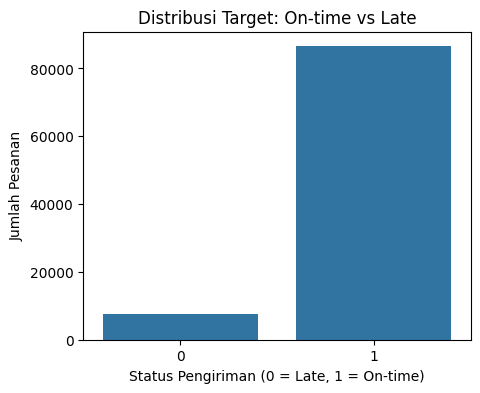

ontime
1    92.028893
0     7.971107
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x="ontime", data=df_by_order_cleaned)
plt.title("Distribusi Target: On-time vs Late")
plt.xlabel("Status Pengiriman (0 = Late, 1 = On-time)")
plt.ylabel("Jumlah Pesanan")
plt.show()

print(df_by_order_cleaned["ontime"].value_counts(normalize=True)*100)

In [ ]:
df_by_order_cleaned['ontime'].value_counts()

,count
ontime,
1,86509
0,7493


Keterangan:
- 0 adalah terlambat (pesanan sampai setelah estimasi)
- 1 adalah on time (pesanan sampai sebelum estimasi)
Persentase keterlambatan untuk seluruh dataset adalah 7,97%

## Mengecek Missing Data Value

In [ ]:
missing = df_by_order_cleaned.isna().sum()
missing_pct = (missing / len(df_by_order_cleaned)) * 100
missing_df = pd.DataFrame({"missing": missing, "missing_pct": missing_pct})

missing_result = missing_df[missing_df["missing"] > 0].sort_values("missing_pct", ascending=False)

if missing_result.empty:
    print("Tidak ada missing value di dataset.")
else:
    display(missing_result)


Tidak ada missing value di dataset.


## Distribusi Fitur Numerik

Pada bagian ini kita melihat sebaran dari fitur numerik yang penting:  
- **avg_distance_km** → jarak rata-rata pengiriman  
- **total_freight** → biaya ongkos kirim  
- **first_item_product_weight_g** → berat produk pertama dalam pesanan  

Tujuan: mengetahui apakah distribusi data normal, apakah ada skewness, dan mendeteksi kemungkinan adanya outlier ekstrem.

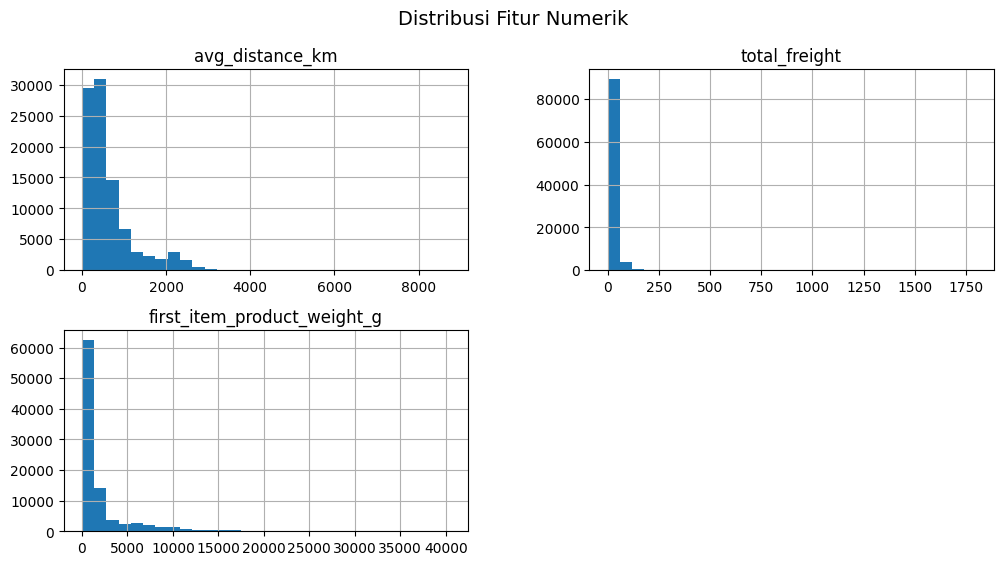

In [ ]:
num_cols = ["avg_distance_km", "total_freight", "first_item_product_weight_g"]
num_cols = [c for c in num_cols if c in df_by_order_cleaned.columns]  # keep only valid cols

if num_cols:
    df_by_order_cleaned[num_cols].hist(bins=30, figsize=(12,6))
    plt.suptitle("Distribusi Fitur Numerik", fontsize=14)
    plt.show()
else:
    print("Tidak ada kolom numerik yang cocok ditemukan.")

In [ ]:
# Outlier untuk distance
outlier_distance = df_by_order_cleaned[df_by_order_cleaned["avg_distance_km"] > 8000]
print("Jumlah data dengan distance > 8000 km:", len(outlier_distance))
display(outlier_distance[["avg_distance_km", "total_freight", "first_item_product_weight_g"]].head())

# Outlier untuk freight
outlier_freight = df_by_order_cleaned[df_by_order_cleaned["total_freight"] > 1500]
print("Jumlah data dengan total_freight > 1500:", len(outlier_freight))
display(outlier_freight[["avg_distance_km", "total_freight", "first_item_product_weight_g"]].head())


Jumlah data dengan distance > 8000 km: 4


,avg_distance_km,total_freight,first_item_product_weight_g
728,8677.679041,25.60,4900.0
5634,8025.994104,29.25,1350.0
12766,8736.959686,76.67,11710.0
96816,8025.994104,29.24,1900.0


Jumlah data dengan total_freight > 1500: 1


,avg_distance_km,total_freight,first_item_product_weight_g
20074,2133.432406,1794.96,18700.0


Interpretasi Grafik
1. **avg_distance_km**  
   Sebagian besar pesanan memiliki jarak pengiriman < 2000 km, dengan beberapa outlier hingga > 8000 km. Ini menunjukkan distribusi **right-skewed**, wajar karena mayoritas pesanan terjadi dalam kota/provinsi yang relatif dekat, hanya sebagian kecil yang lintas region.

2. **total_freight**  
   Biaya ongkos kirim mayoritas sangat kecil (< 200), tetapi ada beberapa outlier hingga > 1500. Distribusinya juga **sangat skewed ke kanan**. Hal ini bisa berarti ada transaksi khusus dengan biaya tinggi (misalnya pengiriman barang besar/berat).

3. **first_item_product_weight_g**  
   Mayoritas produk punya berat < 5000 gram (5 kg), tapi ada beberapa outlier ekstrem hingga puluhan ribu gram. Distribusi ini juga **sangat skewed** dengan long-tail ke kanan, kemungkinan karena produk tertentu (misalnya furnitur atau elektronik besar).

## Analisa Bivariat (Kategori Produk vs Proporsi Keterlambatan)

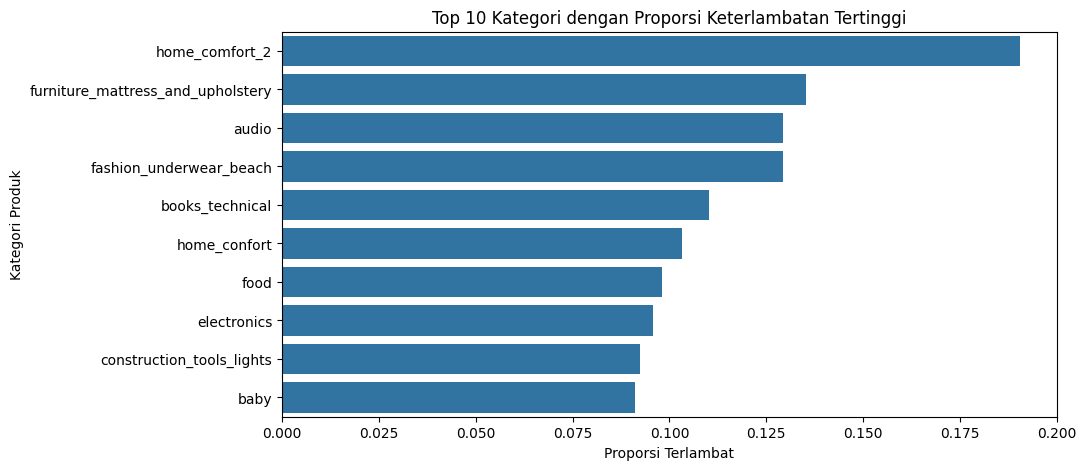

In [ ]:
cat_col = ("product_category_name_english"
           if "product_category_name_english" in df_by_order_cleaned.columns
           else "first_item_product_category_name_english")

cat_delay = (
    df_by_order_cleaned.groupby(cat_col)["ontime"]
    .mean()            # rata-rata ontime per kategori
    .rsub(1)           # 1 - mean(ontime) = proporsi terlambat
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(x=cat_delay.values, y=cat_delay.index)
plt.title("Top 10 Kategori dengan Proporsi Keterlambatan Tertinggi")
plt.xlabel("Proporsi Terlambat")
plt.ylabel("Kategori Produk")
plt.show()


Grafik di atas menunjukkan 10 kategori produk dengan proporsi keterlambatan pengiriman tertinggi.  
Beberapa poin penting yang terlihat:

1. **home_comfort_2** dan **furniture_mattress_and_upholstery** menempati posisi teratas dengan tingkat keterlambatan hingga hampir 20%.  
   Hal ini bisa disebabkan oleh ukuran barang yang besar, berat, atau memerlukan penanganan khusus saat pengiriman.

2. Kategori seperti **audio**, **fashion_underwear_beach**, dan **books_technical** juga menunjukkan tingkat keterlambatan cukup tinggi (sekitar 12–14%).  
   Faktor penyebab bisa berupa rantai pasokan lebih panjang atau stok barang yang terbatas.

3. Beberapa kategori lain seperti **food**, **electronics**, dan **construction_tools_lights** menunjukkan risiko keterlambatan sedang (sekitar 9–11%).  

Insight:
- Barang besar/berat (furnitur, elektronik besar) cenderung lebih rawan keterlambatan.  
- Produk dengan distribusi stok terbatas (buku teknis, fashion niche) juga rentan.  
- Informasi ini penting untuk Olist agar dapat bekerja sama dengan seller & logistik guna memperbaiki SLA khusus pada kategori produk berisiko tinggi.


## Analisa Kohort Pelanggan (Pertumbuhan Pelanggan Baru)

In [ ]:
# Menentukan periode pertama order per customer
df_by_order_cleaned['order_purchase_timestamp'] = pd.to_datetime(df_by_order['order_purchase_timestamp'])

# 1. Buat kolom baru untuk bulan pesanan (YYYY-MM)
df_by_order_cleaned['order_month'] = df_by_order_cleaned['order_purchase_timestamp'].dt.to_period('M')

# 2. Cari bulan akuisisi (bulan pertama order) untuk setiap pelanggan
df_by_order_cleaned['cohort_month'] = df_by_order_cleaned.groupby('customer_unique_id')['order_month'] \
                                     .transform('min')

print("--- Contoh Data dengan Bulan Akuisisi (Cohort) ---")
display(df_by_order_cleaned[['customer_unique_id', 'order_month', 'cohort_month']].head())

--- Contoh Data dengan Bulan Akuisisi (Cohort) ---


,customer_unique_id,order_month,cohort_month
0,7c396fd4830fd04220f754e42b4e5bff,2017-10,2017-09
1,af07308b275d755c9edb36a90c618231,2018-07,2018-07
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08,2018-08
3,7c142cf63193a1473d2e66489a9ae977,2017-11,2017-11
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02,2018-02


In [ ]:
# Fungsi untuk menghitung selisih bulan
def get_month_diff(df, date_col, cohort_col):
    year_diff = df[date_col].dt.year - df[cohort_col].dt.year
    month_diff = df[date_col].dt.month - df[cohort_col].dt.month
    return year_diff * 12 + month_diff

# 3. Hitung cohort index
df_by_order_cleaned['cohort_index'] = get_month_diff(df_by_order_cleaned, 'order_month', 'cohort_month')

print("\n--- Contoh Data dengan Cohort Index ---")
display(df_by_order_cleaned[['customer_unique_id', 'order_month', 'cohort_month', 'cohort_index']].head())


--- Contoh Data dengan Cohort Index ---


,customer_unique_id,order_month,cohort_month,cohort_index
0,7c396fd4830fd04220f754e42b4e5bff,2017-10,2017-09,1
1,af07308b275d755c9edb36a90c618231,2018-07,2018-07,0
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08,2018-08,0
3,7c142cf63193a1473d2e66489a9ae977,2017-11,2017-11,0
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02,2018-02,0


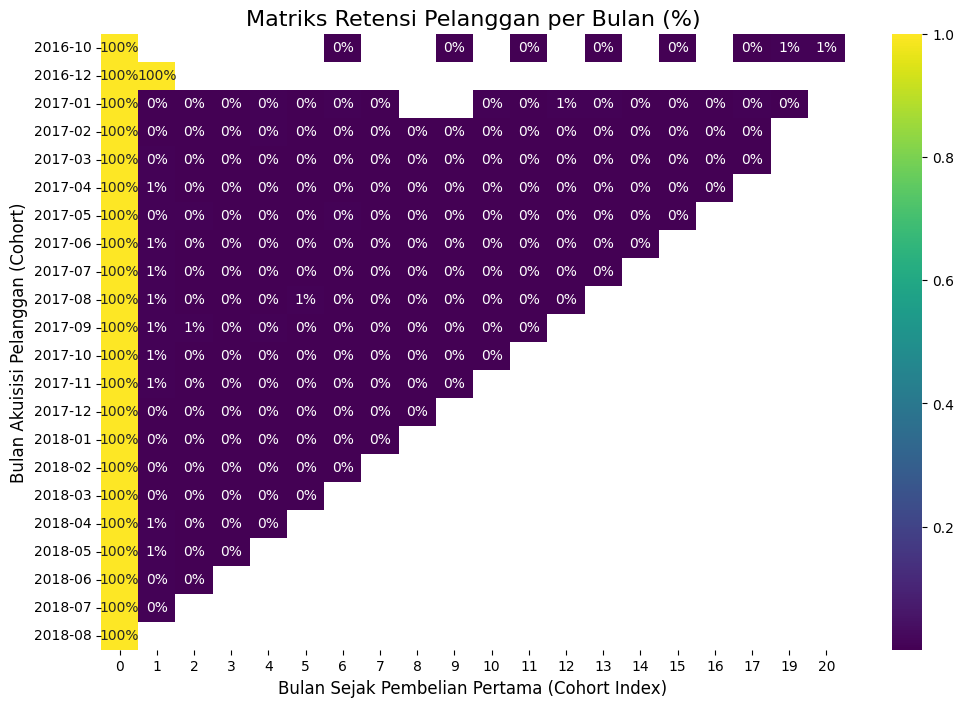

In [ ]:
# 4. Buat pivot table untuk menghitung jumlah pelanggan aktif per kohort
cohort_data = df_by_order_cleaned.groupby(['cohort_month', 'cohort_index'])['customer_unique_id'].nunique().reset_index()
cohort_pivot = cohort_data.pivot_table(index='cohort_month', columns='cohort_index', values='customer_unique_id')

# 5. Hitung persentase retensi
# Ambil jumlah pelanggan awal (di bulan pertama, cohort_index = 0) sebagai basis
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

# 6. Visualisasikan dengan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='viridis')
plt.title('Matriks Retensi Pelanggan per Bulan (%)', fontsize=16)
plt.xlabel('Bulan Sejak Pembelian Pertama (Cohort Index)', fontsize=12)
plt.ylabel('Bulan Akuisisi Pelanggan (Cohort)', fontsize=12)
plt.show()

Dari pivot table diatas, ditunjukan bahwa pembeli hampir tidak melakukan pembelian kembali (repeat order) melalui Olist.

Dengan informasi tersebut, menunjukan bahwa Olist bertumbuh dengan mengandalkan kemampuannya secara continue untuk mengakuisisi pengguna baru. Dimana model ini adalah model dengan biaya dan risiko yang tinggi (Biaya akusisi pengguna baru cenderung lebih tinggi daripada mempertahankan pelanggan yang sudah ada)

Referensi:....

Fokus utama yang dapat dilakukan oleh Olist:
- Memperbaiki pengalaman pengguna, terutama terkait pengiriman
- Membangun program loyalitas sederhana untuk meningkatkan potensi pembelian kedua, dst
- Memulai survei kepada pelanggan, apakah terdapat isu selain pengiriman yang membuat pengguna enggan melakukan pembelian ulang?


## Analisa Pertumbuhan Order Vs Keterlambatan & Akuisisi Pengguna Baru

In [ ]:
# Asumsi 'df_by_order' sudah berisi kolom 'order_month' dan 'cohort_month' dari analisis kohort
# dan 'status_pengiriman' dari analisis service level.

# Hitung jumlah customer baru per bulan
new_customers_per_month = df_by_order_cleaned.groupby('cohort_month')['customer_unique_id'].nunique().reset_index()
new_customers_per_month.rename(columns={'cohort_month': 'order_month', 'customer_unique_id': 'jumlah_customer_baru'}, inplace=True)

# Agregasi data utama per bulan
monthly_summary_df = df_by_order_cleaned.groupby('order_month').agg(
    jumlah_order=('order_id', 'nunique'),
    jumlah_order_terlambat=('ontime', lambda x: (x == 0 ).sum()),
    pengguna_aktif_bulanan=('customer_unique_id', 'nunique')
).reset_index()

# Gabungkan dengan data customer baru
monthly_summary_df = pd.merge(monthly_summary_df, new_customers_per_month, on='order_month', how='left')

# Hitung metrik turunan
monthly_summary_df['persen_order_terlambat'] = (monthly_summary_df['jumlah_order_terlambat'] / monthly_summary_df['jumlah_order']) * 100
monthly_summary_df['order_per_pelanggan'] = monthly_summary_df['jumlah_order'] / monthly_summary_df['pengguna_aktif_bulanan']

print("--- Tabel Summary Bulanan ---")
display(monthly_summary_df.head())

--- Tabel Summary Bulanan ---


,order_month,jumlah_order,jumlah_order_terlambat,pengguna_aktif_bulanan,jumlah_customer_baru,persen_order_terlambat,order_per_pelanggan
0,2016-10,265,2,262,262,0.754717,1.011450
1,2016-12,1,0,1,1,0.000000,1.000000
2,2017-01,728,22,697,696,3.021978,1.044476
3,2017-02,1582,44,1562,1560,2.781290,1.012804
4,2017-03,2468,133,2433,2428,5.388979,1.014386


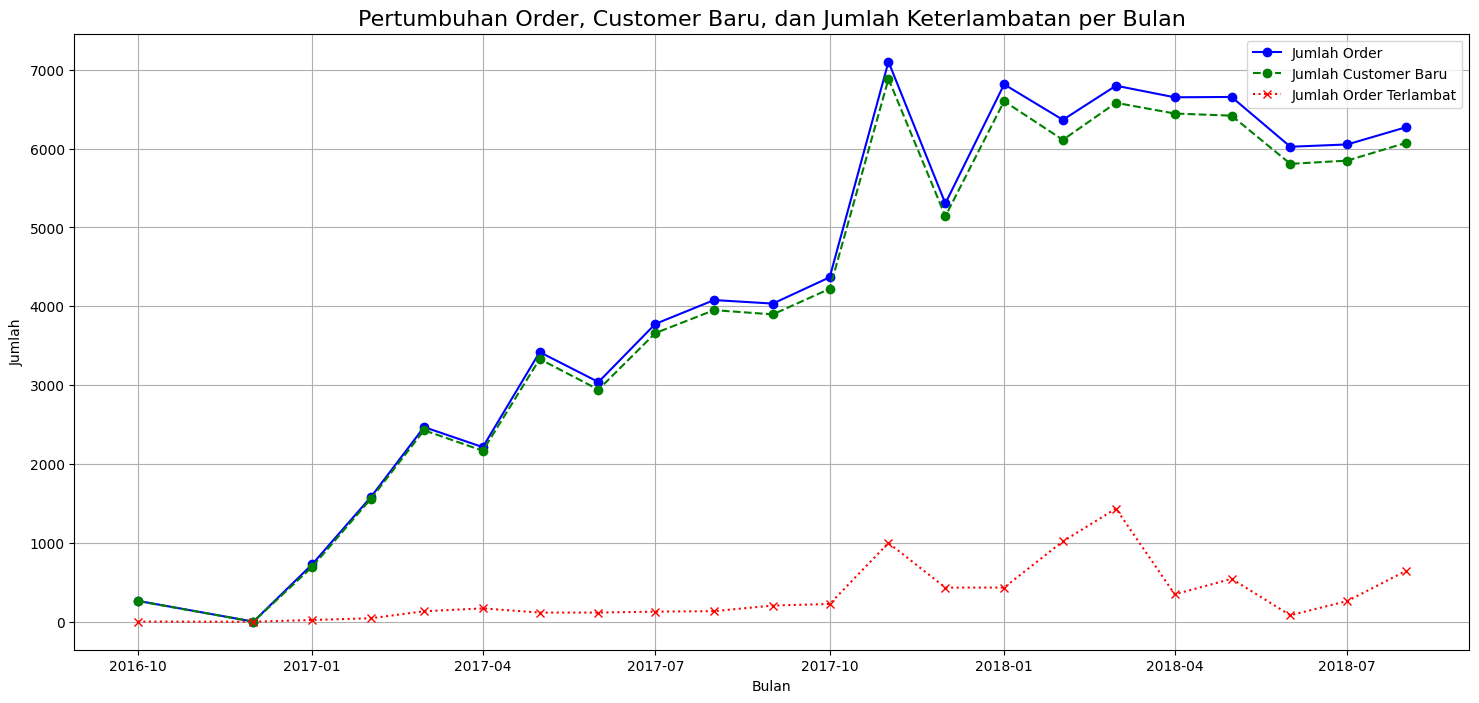

In [ ]:
import matplotlib.pyplot as plt

# Asumsi 'monthly_summary_df' sudah ada dan berisi kolom yang diperlukan.
# Konversi 'order_month' ke timestamp untuk plotting yang lebih baik
monthly_summary_df['order_month_ts'] = monthly_summary_df['order_month'].dt.to_timestamp()

# Membuat plot dengan satu sumbu Y
plt.figure(figsize=(18, 8))

# Plot metrik utama (semua dalam skala 'Jumlah')
plt.plot(monthly_summary_df['order_month_ts'], monthly_summary_df['jumlah_order'], color='blue', marker='o', label='Jumlah Order')
plt.plot(monthly_summary_df['order_month_ts'], monthly_summary_df['jumlah_customer_baru'], color='green', marker='o', linestyle='--', label='Jumlah Customer Baru')
# --- BARIS YANG DIUBAH ---
plt.plot(monthly_summary_df['order_month_ts'], monthly_summary_df['jumlah_order_terlambat'], color='red', marker='x', linestyle=':', label='Jumlah Order Terlambat')

# Pengaturan label dan judul
plt.title('Pertumbuhan Order, Customer Baru, dan Jumlah Keterlambatan per Bulan', fontsize=16)
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.legend()
plt.grid(True)
plt.show()

Dari grafik ini, kita melihat adanya keterbatasan dari metode akuisisi pengguna baru yang dijalankan oleh Olist.
- Kecenderungan periode 2016 -2017 ada peningkatan jumlah pengguna dari bulan ke bulan. Penurunan terjadi di beberapa bulan, tetapi di bulan selanjutnya akan terjadi recovery dan melanjutkan kenaikan jumlah pengguna
- Kecederungan periode 2018 untuk penurunan jumlah pengguna dari bulan ke bulan. Kita melihat puncak tertinggi jumlah pengguna di Januari 2018 dan terjadinya penurunan jumlah pengguna sampai dengan Agustus 2018 ( jumlah pengguna tidak dapat lebih tinggi dari periode Januari 2018)

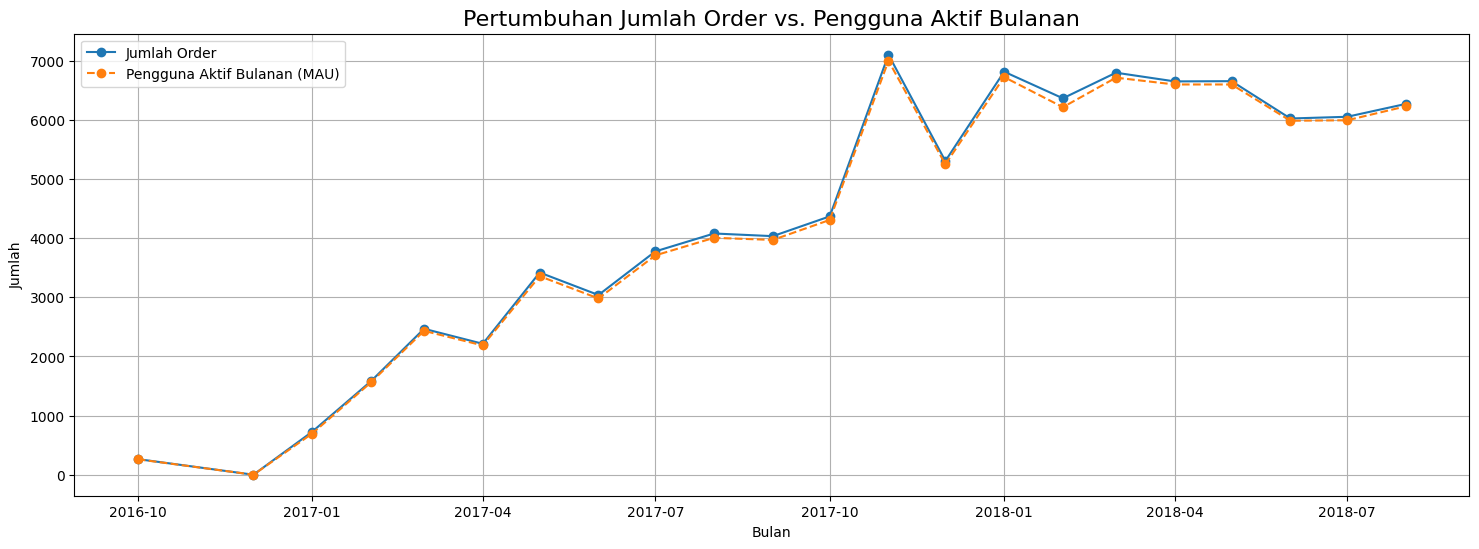

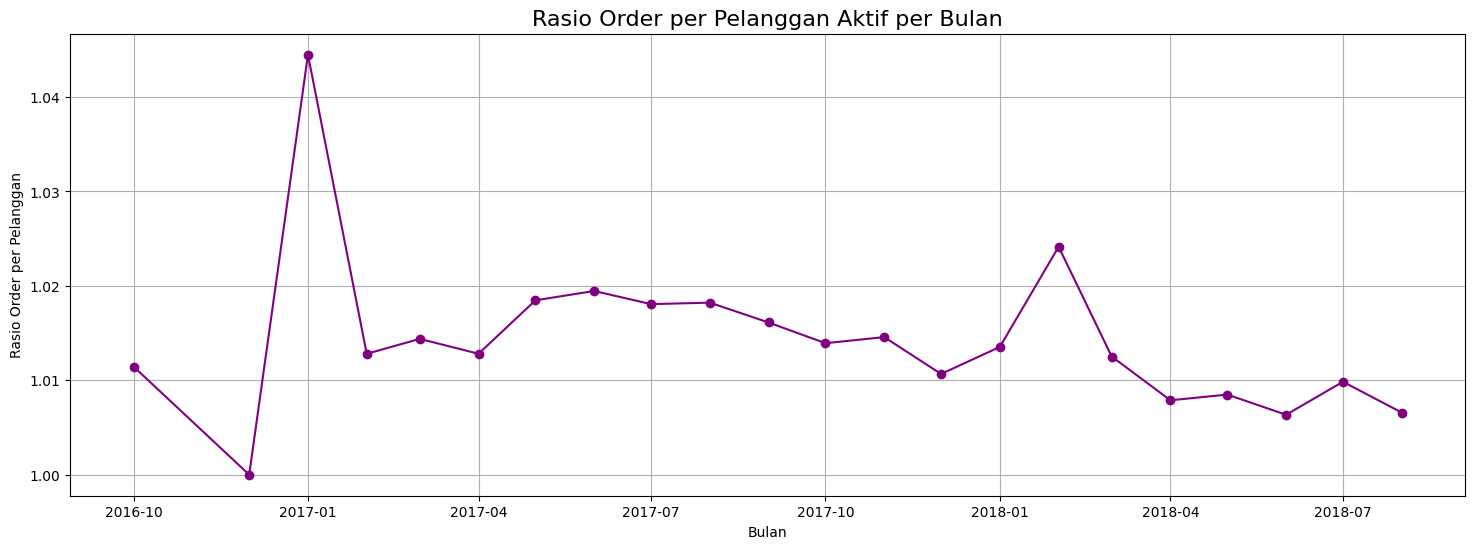

In [ ]:
# Grafik 1: Pertumbuhan Absolut
plt.figure(figsize=(18, 6))
plt.plot(monthly_summary_df['order_month_ts'], monthly_summary_df['jumlah_order'], marker='o', label='Jumlah Order')
plt.plot(monthly_summary_df['order_month_ts'], monthly_summary_df['pengguna_aktif_bulanan'], marker='o', linestyle='--', label='Pengguna Aktif Bulanan (MAU)')
plt.title('Pertumbuhan Jumlah Order vs. Pengguna Aktif Bulanan', fontsize=16)
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.legend()
plt.grid(True)
plt.show()

# Grafik 2: Analisis Rasio (Engagement)
plt.figure(figsize=(18, 6))
plt.plot(monthly_summary_df['order_month_ts'], monthly_summary_df['order_per_pelanggan'], marker='o', color='purple')
plt.title('Rasio Order per Pelanggan Aktif per Bulan', fontsize=16)
plt.xlabel('Bulan')
plt.ylabel('Rasio Order per Pelanggan')
plt.grid(True)
plt.show()

Garifk pendukung tingkat retensi dari sisi Order per Customer

## Analisa Service Level (Korelasi Ketepatan pengiriman denga Skor Review)

Analisis Deskriptif & Visualisasi

--- Rata-rata Skor Review Berdasarkan Ketepatan Waktu ---
   ontime  skor_review
0       0     2.567596
1       1     4.294989


/tmp/ipython-input-3705448239.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ontime', y='skor_review', data=avg_score_by_delivery, palette=['#34A853', '#EA4335'])


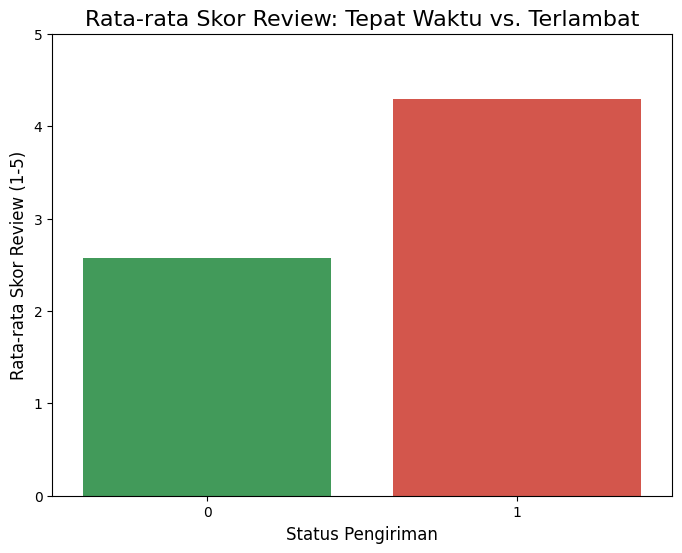

In [ ]:
# Pertama, kita filter data untuk hanya menganalisis pesanan yang memiliki review
# Skor 0 kita asumsikan sebagai pesanan tanpa review, jadi kita kecualikan.
reviewed_orders_df = df_by_order_cleaned[df_by_order_cleaned['skor_review'] > 0].copy()

# 1. Hitung rata-rata skor review untuk setiap status pengiriman
avg_score_by_delivery = reviewed_orders_df.groupby('ontime')['skor_review'].mean().reset_index()

print("--- Rata-rata Skor Review Berdasarkan Ketepatan Waktu ---")
print(avg_score_by_delivery)

# 2. Visualisasikan perbandingan tersebut
plt.figure(figsize=(8, 6))
sns.barplot(x='ontime', y='skor_review', data=avg_score_by_delivery, palette=['#34A853', '#EA4335'])
plt.title('Rata-rata Skor Review: Tepat Waktu vs. Terlambat', fontsize=16)
plt.xlabel('Status Pengiriman', fontsize=12)
plt.ylabel('Rata-rata Skor Review (1-5)', fontsize=12)
plt.ylim(0, 5) # Set limit sumbu y dari 0 hingga 5
plt.show()

Hasil dari Grafik diatas menunjukan  perbedaan yang sangat jelas dari score review untuk pesanan yang tiba tepat waktu dan yang terlambat. Meskipun demikian, hasil rata-rata score review pesanan perlu ditelusuri lebih lanjut untuk menemukan potensi anomalinya

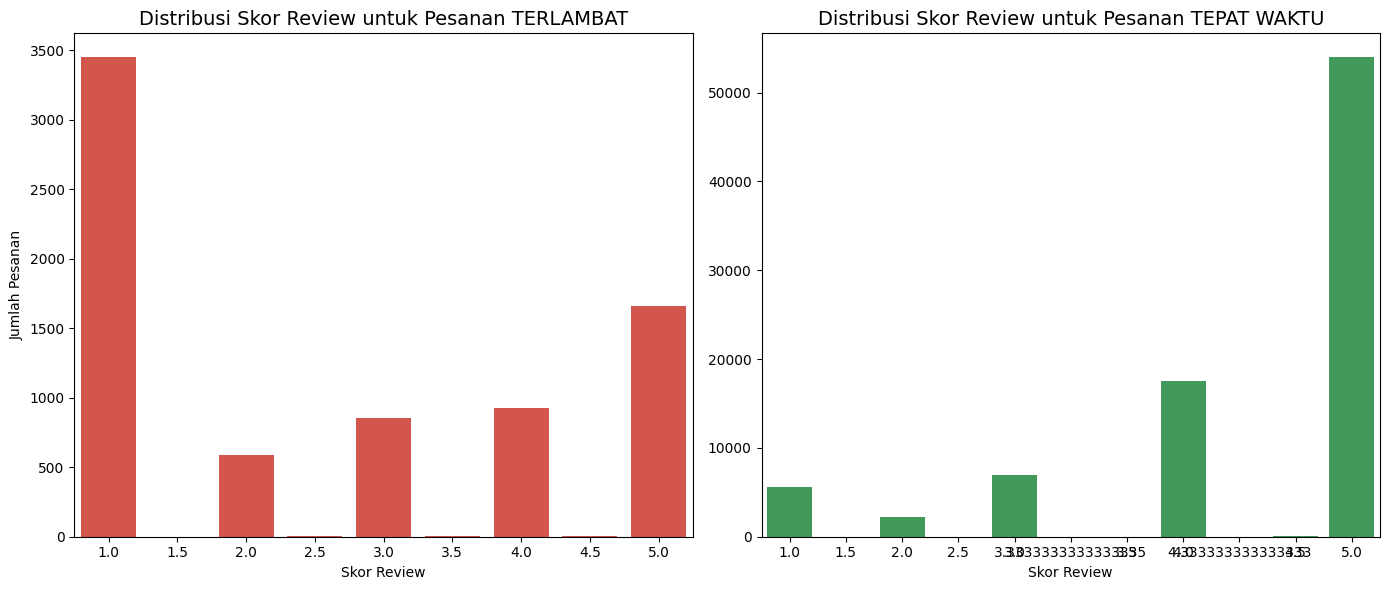

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat area plot dengan 1 baris dan 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot untuk pesanan TERLAMBAT (ontime = 0)
sns.countplot(x='skor_review', data=reviewed_orders_df[reviewed_orders_df['ontime'] == 0], ax=axes[0], color='#EA4335')
axes[0].set_title('Distribusi Skor Review untuk Pesanan TERLAMBAT', fontsize=14)
axes[0].set_xlabel('Skor Review')
axes[0].set_ylabel('Jumlah Pesanan')

# Plot untuk pesanan TEPAT WAKTU (ontime = 1)
sns.countplot(x='skor_review', data=reviewed_orders_df[reviewed_orders_df['ontime'] == 1], ax=axes[1], color='#34A853')
axes[1].set_title('Distribusi Skor Review untuk Pesanan TEPAT WAKTU', fontsize=14)
axes[1].set_xlabel('Skor Review')
axes[1].set_ylabel('') # Hapus label y agar tidak redundant

plt.tight_layout()
plt.show()

Mengidentifikasi Potensi Anomali 💡

Berdasarkan grafik diatas, ada dua jenis anomali yang sangat menarik untuk diinvestigasi:

- Anomali Positif: Pesanan yang terlambat tetapi tetap mendapatkan skor review tinggi (4 atau 5).

- Anomali Negatif: Pesanan yang tepat waktu tetapi malah mendapatkan skor review rendah (1 atau 2).

Argumentasi:
- Anomali Positif bisa menunjukkan adanya layanan pelanggan yang luar biasa (misalnya, komplain ditangani dengan sangat baik) yang berhasil membalikkan kekecewaan pelanggan.

- Anomali Negatif menunjukkan bahwa ketepatan waktu saja tidak cukup. Mungkin ada masalah lain seperti kualitas produk, kerusakan barang, atau kemasan yang buruk.

In [ ]:
# 1. Menemukan Anomali Positif: Terlambat tapi Skor Tinggi
anomali_positif = reviewed_orders_df[
    (reviewed_orders_df['ontime'] == 0) &
    (reviewed_orders_df['skor_review'] >= 4)
]

print(f"--- Anomali Positif: Ditemukan {len(anomali_positif)} pesanan yang terlambat tapi mendapat skor tinggi (>=4) ---")
# Tampilkan beberapa contoh, perhatikan kolom status, tanggal, dan skor
display(anomali_positif[['order_status', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'skor_review']].head())


# 2. Menemukan Anomali Negatif: Tepat Waktu tapi Skor Rendah
anomali_negatif = reviewed_orders_df[
    (reviewed_orders_df['ontime'] == 1) &
    (reviewed_orders_df['skor_review'] <= 2)
]

print(f"\n--- Anomali Negatif: Ditemukan {len(anomali_negatif)} pesanan yang tepat waktu tapi mendapat skor rendah (<=2) ---")
# Untuk anomali ini, kita mungkin perlu melihat data review text (jika ada) untuk tahu penyebabnya
display(anomali_negatif[['order_status', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'skor_review']].head())

--- Anomali Positif: Ditemukan 2591 pesanan yang terlambat tapi mendapat skor tinggi (>=4) ---


,order_status,order_delivered_customer_date,order_estimated_delivery_date,skor_review
35,delivered,2018-03-20 00:59:25,2018-03-20,5.0
102,delivered,2018-08-03 19:28:47,2018-08-02,5.0
152,delivered,2018-03-09 21:52:36,2018-03-09,5.0
196,delivered,2018-06-07 13:58:42,2018-06-06,4.0
226,delivered,2018-08-15 15:02:09,2018-08-15,5.0



--- Anomali Negatif: Ditemukan 7929 pesanan yang tepat waktu tapi mendapat skor rendah (<=2) ---


,order_status,order_delivered_customer_date,order_estimated_delivery_date,skor_review
8,delivered,2017-02-02 14:08:10,2017-03-06,1.0
10,delivered,2017-05-29 11:18:31,2017-06-07,1.0
26,delivered,2018-06-16 15:20:55,2018-07-18,1.0
30,delivered,2017-08-18 14:28:02,2017-08-23,2.0
31,delivered,2018-05-05 12:28:34,2018-05-15,1.0


Hasil penelusuran lebih lanjut ditemukan
- Anomali Positif sebanyak 2.647 order (2,74%)
- Anomali Negatif sebanyak 8.103 order (8,40%)

Dari temuan ini, menunjukan bahwa ketepatan pengiriman menjadi faktor yang mempengaruhi kepuasan pembeli dalam menggunakan layanan Olist. Dimana hal tersebut juga akan mempengaruhi keputusan pembeli akan menggunakan kembali (retensi) Olist. Meskipun demikian, terdapat faktor lainnya yang mempengaruhi retensi pembeli. Dimana terdapat 11,14% dari keseluruhan order yang ditemukan sebagai anomali.
Untuk memperkuat argumentasi pengaruh dari ketepatan pengiriman terhadap score review, kita akan melakukan pengujian secara statistik.

Uji Statistik (Independent t-test)

Independent t-test adalah uji statistik yang tepat untuk kasus ini karena kita membandingkan nilai rata-rata dari dua kelompok yang independen satu sama lain.

Hipotesis Nol (H_0): Tidak ada perbedaan yang signifikan antara rata-rata skor review pesanan yang 'Tepat Waktu' dan 'Terlambat'.

Hipotesis Alternatif (H_1): Terdapat perbedaan yang signifikan antara rata-rata skor review kedua kelompok.

Kita akan menggunakan ambang batas signifikansi (alpha) 0.05. Jika p-value yang dihasilkan lebih kecil dari 0.05, kita dapat menolak Hipotesis Nol dan menyimpulkan bahwa ketepatan waktu pengiriman memang berpengaruh signifikan terhadap skor review.

In [ ]:
# 1. Pisahkan data skor review menjadi dua kelompok
skor_tepat_waktu = reviewed_orders_df[reviewed_orders_df['ontime'] == 1]['skor_review']
skor_terlambat = reviewed_orders_df[reviewed_orders_df['ontime'] == 0]['skor_review']

# 2. Lakukan independent t-test
# Menggunakan equal_var=False (Welch's t-test) lebih aman karena tidak mengasumsikan varians kedua kelompok sama
t_statistic, p_value = stats.ttest_ind(skor_tepat_waktu, skor_terlambat, equal_var=False)

print("\n--- Hasil Uji Statistik (Independent t-test) ---")
print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-value: {p_value}")

# 3. Interpretasi hasil
alpha = 0.05
if p_value < alpha:
    print("\nKesimpulan: P-value lebih kecil dari 0.05. Kita menolak Hipotesis Nol.")
    print("Artinya, TERDAPAT PERBEDAAN YANG SIGNIFIKAN secara statistik pada skor review antara pesanan yang tepat waktu dan yang terlambat.")
else:
    print("\nKesimpulan: P-value lebih besar dari 0.05. Kita gagal menolak Hipotesis Nol.")
    print("Artinya, TIDAK ADA PERBEDAAN YANG SIGNIFIKAN secara statistik pada skor review antara kedua kelompok.")


--- Hasil Uji Statistik (Independent t-test) ---
T-Statistic: 88.4296
P-value: 0.0

Kesimpulan: P-value lebih kecil dari 0.05. Kita menolak Hipotesis Nol.
Artinya, TERDAPAT PERBEDAAN YANG SIGNIFIKAN secara statistik pada skor review antara pesanan yang tepat waktu dan yang terlambat.


## Analisis Tingkat Keterlambatan: Apakah "Semakin Lama Terlambat, Semakin Buruk Skornya"?

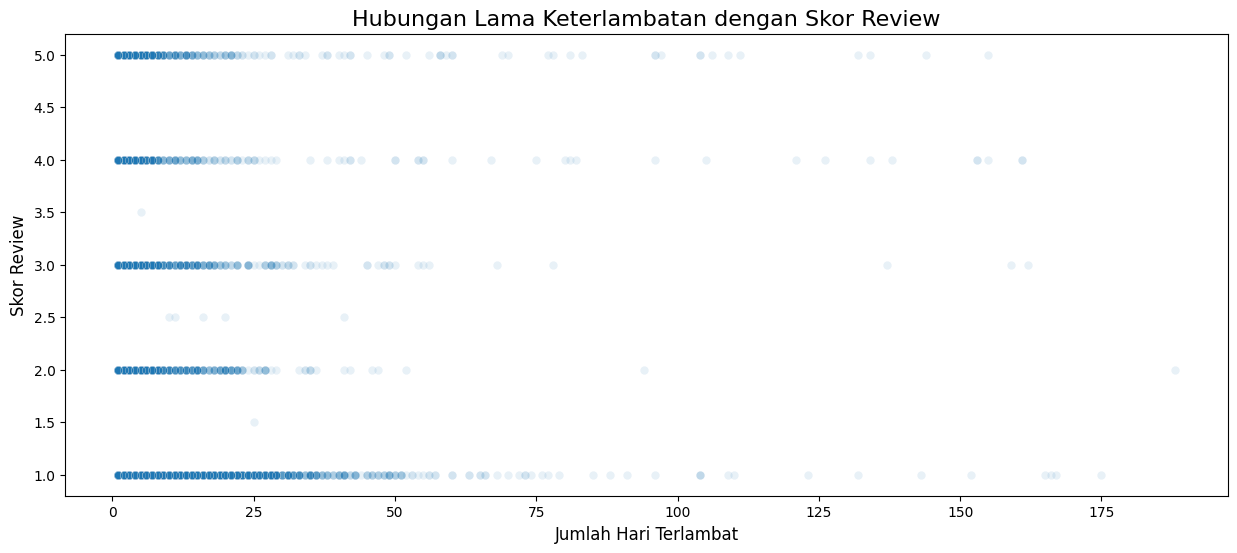


--- Korelasi antara Lama Keterlambatan dan Skor Review ---
                    hari_keterlambatan  skor_review
hari_keterlambatan            1.000000    -0.149496
skor_review                  -0.149496     1.000000


In [ ]:
# Buat kolom baru untuk menghitung selisih hari keterlambatan
reviewed_orders_df['hari_keterlambatan'] = (reviewed_orders_df['order_delivered_customer_date'] - reviewed_orders_df['order_estimated_delivery_date']).dt.days

# Filter hanya untuk pesanan yang terlambat dan keterlambatan > 0
data_terlambat = reviewed_orders_df[reviewed_orders_df['hari_keterlambatan'] > 0]

# Visualisasi scatter plot
plt.figure(figsize=(15, 6))
sns.scatterplot(x='hari_keterlambatan', y='skor_review', data=data_terlambat, alpha=0.1)
plt.title('Hubungan Lama Keterlambatan dengan Skor Review', fontsize=16)
plt.xlabel('Jumlah Hari Terlambat', fontsize=12)
plt.ylabel('Skor Review', fontsize=12)
plt.show()

# Hitung korelasi
correlation = data_terlambat[['hari_keterlambatan', 'skor_review']].corr()
print("\n--- Korelasi antara Lama Keterlambatan dan Skor Review ---")
print(correlation)

Berdasarkan scatter plot diatas,terdapat korelasi negatif antara hari keterlambaran dengan score review. Terdapat kecenderungan semakin terlambat pesanan akan semakin rendah score review yang diberikan. Dimana kalau kita melihat pada plot di atas, akan samakin jarang sebuah pesanan mendapat score 5 jika dilihat dari kiri ke kanan.

Berdasarkan scatter plot sebelumnya, kita melihat bahwa pesanan yang terlambat berada di range 1- 25 hari keterlambatan. Untuk melihat lebih lanjut terkait batas toleransi pembeli terhadap keterlambatan, maka akan dilanjutkan dengan grafik dibawah ini.

/tmp/ipython-input-1554287672.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_terlambat['kelompok_keterlambatan'] = pd.cut(data_terlambat['hari_keterlambatan'], bins=bins, labels=labels, right=False)
/tmp/ipython-input-1554287672.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_score_per_bin = data_terlambat.groupby('kelompok_keterlambatan')['skor_review'].mean().reset_index()


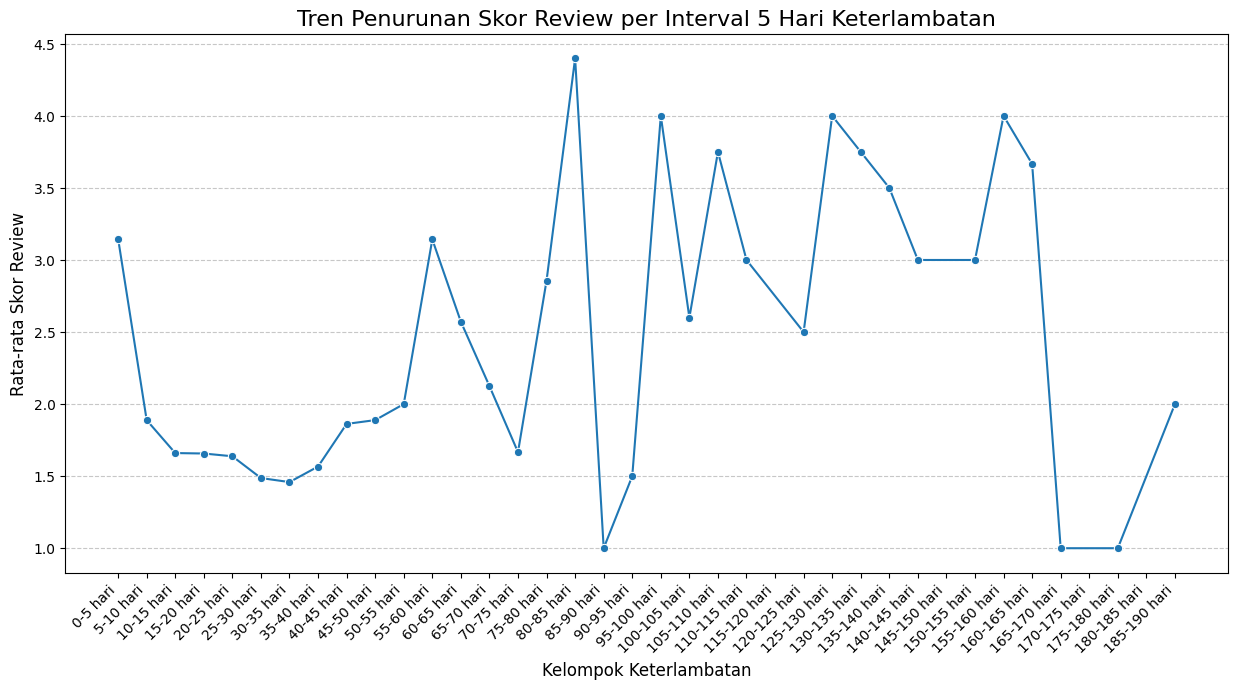

In [ ]:
# 1. Membuat kelompok (bin) per 5 hari
# Tentukan batas atas untuk binning, tambahkan 5 agar nilai maks ikut ter-cover
max_delay = data_terlambat['hari_keterlambatan'].max()
bins = np.arange(0, max_delay + 5, 5)

# Buat label untuk setiap bin, contoh: "0-5 hari", "5-10 hari", dst.
labels = [f"{i}-{i+5} hari" for i in bins[:-1]]

# Buat kolom baru di DataFrame yang berisi kelompok bin untuk setiap baris
data_terlambat['kelompok_keterlambatan'] = pd.cut(data_terlambat['hari_keterlambatan'], bins=bins, labels=labels, right=False)

# 2. Hitung rata-rata skor review untuk setiap kelompok
avg_score_per_bin = data_terlambat.groupby('kelompok_keterlambatan')['skor_review'].mean().reset_index()

# 3. Visualisasikan hasilnya dengan line plot
plt.figure(figsize=(15, 7))
sns.lineplot(x='kelompok_keterlambatan', y='skor_review', data=avg_score_per_bin, marker='o', sort=False)
plt.title('Tren Penurunan Skor Review per Interval 5 Hari Keterlambatan', fontsize=16)
plt.xlabel('Kelompok Keterlambatan', fontsize=12)
plt.ylabel('Rata-rata Skor Review', fontsize=12)
plt.xticks(rotation=45, ha='right') # Memutar label sumbu x agar tidak tumpang tindih
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Berdasarkan informasi sebelumnya, kita hanya akan menyoroti keterlambatan (1 - 25 hari)

Dari grafik ini, menunjukan adanya pengelompokkan dari sisi customer terkait keterlambatan pesanan. Dengan kecenderungan yang sudah kita temukan sebelumnya, bahwa semakin terlambat akan menurunkan score review juga. kita menemukan pola yang sama data keterlambatan (1 -25 hari).

Berdasarkan hal tersebut, maka kami merekomendasikan
- Membuat pengelompokkan keterlambatan, dimana harus dibentuk SOP dan tindakan penanganan atas layanan yang tidak sesuai kepada pembeli. (Pemberian notifikasi dan kompensasi)
- Mengevaluasi kembali perhitungan SLA yang dilakukan untuk mengurangi potensi keterlambatan


## Analisa Hubungan Jarak dengan Waktu Pengiriman Terhadap Keterlambatan

Hubungan jarak pengirim(Seller) dan penerima(Buyer) dengan waktu pengiriman

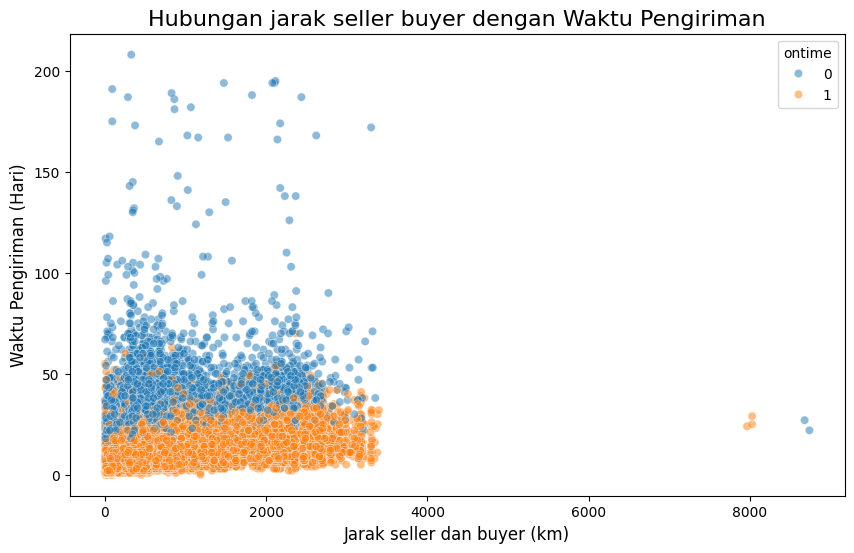

Korelasi pearson jarak seller buyer dan waktu pengiriman
                       avg_distance_km  waktu_pengiriman_hari
avg_distance_km               1.000000               0.395357
waktu_pengiriman_hari         0.395357               1.000000


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_distance_km', y='waktu_pengiriman_hari', data=df_by_order_cleaned, alpha=0.5, hue='ontime')
plt.title('Hubungan jarak seller buyer dengan Waktu Pengiriman', fontsize=16)
plt.xlabel('Jarak seller dan buyer (km)', fontsize=12)
plt.ylabel('Waktu Pengiriman (Hari)', fontsize=12)
plt.show()

correlation_distance_time = df_by_order_cleaned[['avg_distance_km', 'waktu_pengiriman_hari']].corr()
print('Korelasi pearson jarak seller buyer dan waktu pengiriman')
print(correlation_distance_time)

Hasil plot menunjukkan adanya kecenderungan waktu pengiriman yang lebih lama seiring dengan bertambahnya jarak antara penjual dan pembeli. Meskipun ada variasi, titik-titik data cenderung membentuk pola yang naik ke kanan.

Nilai korelasi Pearson antara avg_distance_km dan waktu_pengiriman_hari adalah sekitar 0.393. Nilai ini menunjukkan korelasi positif yang moderat. Ini berarti bahwa ada hubungan linear yang cukup jelas: semakin jauh jarak pengiriman, cenderung semakin lama waktu yang dibutuhkan untuk pengiriman.

In [ ]:
# --- PERSIAPAN DATA ---
# Mengambil seller_state untuk setiap order_id dari data level item.
# Kita ambil yang pertama, karena mayoritas order hanya dari 1 seller.
seller_state_per_order = df_by_item.groupby('order_id')['seller_state'].first().reset_index()

# Gabungkan informasi seller_state ke data level pesanan
df = pd.merge(df_by_order_cleaned, seller_state_per_order, on='order_id', how='left')

# Hapus baris yang mungkin tidak memiliki seller_state (jika ada anomali)
df.dropna(subset=['seller_state'], inplace=True)

print("DataFrame siap untuk analisis geospasial.")

DataFrame siap untuk analisis geospasial.


Analisis Sisi Pembeli

In [ ]:
# 1. Agregasi data per customer_state
customer_state_analysis = df.groupby('customer_state').agg(
    jumlah_order=('order_id', 'nunique'),
    avg_waktu_pengiriman=('waktu_pengiriman_hari', 'mean'),
    avg_jarak_km=('avg_distance_km', 'mean'),
    persentase_terlambat=('ontime', lambda x: (x == 0).sum() / len(x) * 100)
).reset_index()

# 2. Membuat 'Indeks Inefisiensi'
# Nilai yang lebih tinggi berarti waktu pengiriman lebih lama dari yang diperkirakan berdasarkan jarak
customer_state_analysis['indeks_inefisiensi'] = customer_state_analysis['avg_waktu_pengiriman'] / customer_state_analysis['avg_jarak_km']

# 3. Tampilkan hasil, diurutkan berdasarkan inefisiensi
print("--- Analisis Inefisiensi per Negara Bagian Pembeli ---")
display(customer_state_analysis.sort_values(by='indeks_inefisiensi', ascending=False).head(10))

--- Analisis Inefisiensi per Negara Bagian Pembeli ---


,customer_state,jumlah_order,avg_waktu_pengiriman,avg_jarak_km,persentase_terlambat,indeks_inefisiensi
25,SP,39628,8.278036,250.239134,5.803977,0.033081
18,RJ,11983,14.777602,490.538053,13.302178,0.030125
23,SC,3456,14.362269,572.119144,9.461806,0.025104
17,PR,4810,11.471726,490.194481,4.864865,0.023402
10,MG,11079,11.521979,533.744768,5.532990,0.021587
8,GO,1888,15.049788,778.040811,7.838983,0.019343
7,ES,1941,15.082947,803.422631,11.643483,0.018773
11,MS,688,15.183140,844.029244,11.482558,0.017989
22,RS,5230,14.806501,867.252427,7.093690,0.017073
6,DF,1877,12.497603,835.971644,7.245605,0.014950


Analisis Sisi Penjual

In [ ]:
# 1. Agregasi data per seller_state
seller_state_analysis = df.groupby('seller_state').agg(
    jumlah_order=('order_id', 'nunique'),
    avg_waktu_pengiriman=('waktu_pengiriman_hari', 'mean'),
    avg_jarak_km=('avg_distance_km', 'mean'),
    persentase_terlambat=('ontime', lambda x: (x == 0).sum() / len(x) * 100)
).reset_index()

# 2. Membuat 'Indeks Inefisiensi'
seller_state_analysis['indeks_inefisiensi'] = seller_state_analysis['avg_waktu_pengiriman'] / seller_state_analysis['avg_jarak_km']

# 3. Tampilkan hasil, diurutkan berdasarkan inefisiensi
print("\n--- Analisis Inefisiensi per Negara Bagian Penjual ---")
display(seller_state_analysis.sort_values(by='indeks_inefisiensi', ascending=False).head(10))



--- Analisis Inefisiensi per Negara Bagian Penjual ---


,seller_state,jumlah_order,avg_waktu_pengiriman,avg_jarak_km,persentase_terlambat,indeks_inefisiensi
21,SP,66642,11.839246,542.506699,8.629693,0.021823
7,MG,7374,12.334825,600.580573,5.546515,0.020538
0,AM,3,47.333333,2326.973610,66.666667,0.020341
15,RJ,4071,11.575780,585.129301,8.228936,0.019783
10,PA,8,13.125000,671.619308,12.500000,0.019542
14,PR,7310,12.934610,721.996677,6.374829,0.017915
19,SC,3512,13.249431,749.694234,5.951025,0.017673
4,ES,298,12.369128,813.769605,6.040268,0.015200
5,GO,439,12.437358,852.696716,4.100228,0.014586
3,DF,756,12.071429,849.502314,6.084656,0.014210


Hubungan volume pengiriman dengan keterlambatan


--- Top 15 Rute Pengiriman Paling Bermasalah (Persentase Terlambat) ---


,rute,jumlah_order,avg_waktu_pengiriman,avg_jarak_km,persentase_terlambat
365,SP -> AL,250,24.360000,1902.694820,25.600000
134,MA -> SP,122,15.688525,2325.972821,24.590164
269,RJ -> CE,53,24.547170,2121.129441,22.641509
373,SP -> MA,478,21.370293,2176.829365,20.711297
380,SP -> PI,317,19.817035,2015.671718,17.981073
388,SP -> SE,207,20.835749,1724.472409,16.425121
243,PR -> BA,141,21.347518,1753.966874,16.312057
145,MG -> MA,58,19.724138,1893.174818,15.517241
382,SP -> RJ,7928,15.737639,442.076721,15.312815
369,SP -> CE,947,20.659979,2256.953375,14.994720


Perhatikan tabel di atas untuk melihat apakah rute bolak-balik (misal, SP -> BA vs BA -> SP) memiliki performa yang sama.


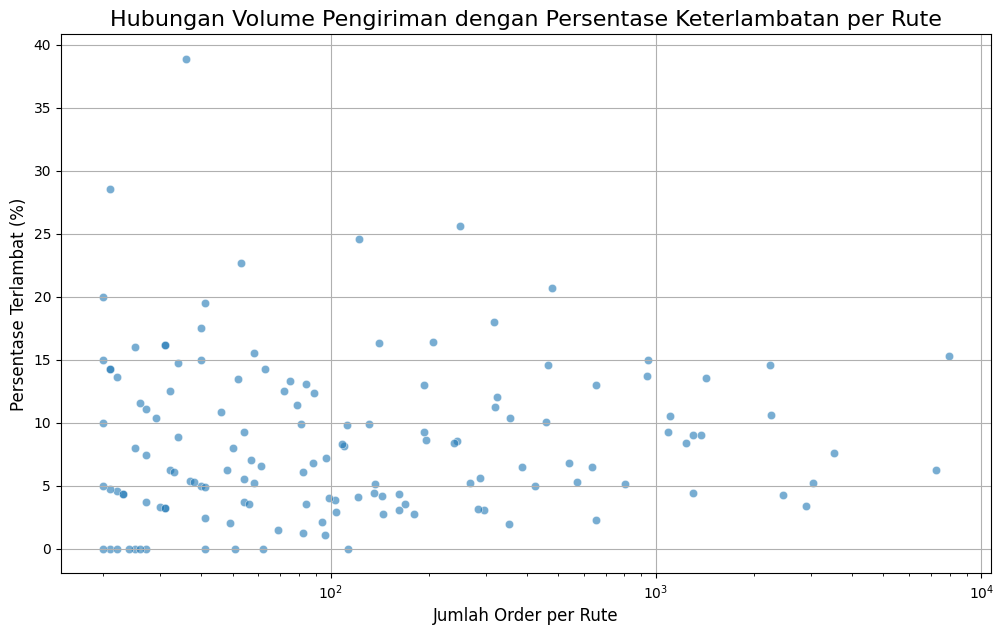

In [ ]:
# 1. Buat kolom 'rute' dan filter rute intra-state
df['rute'] = df['seller_state'] + ' -> ' + df['customer_state']
route_analysis = df[df['seller_state'] != df['customer_state']]

# 2. Agregasi data per rute
route_analysis = route_analysis.groupby('rute').agg(
    jumlah_order=('order_id', 'nunique'),
    avg_waktu_pengiriman=('waktu_pengiriman_hari', 'mean'),
    avg_jarak_km=('avg_distance_km', 'mean'),
    persentase_terlambat=('ontime', lambda x: (x == 0).sum() / len(x) * 100)
).reset_index()

# 3. Tampilkan 15 rute terburuk berdasarkan persentase keterlambatan (dengan minimal 50 order)
print("\n--- Top 15 Rute Pengiriman Paling Bermasalah (Persentase Terlambat) ---")
worst_routes = route_analysis[route_analysis['jumlah_order'] >= 50].sort_values(by='persentase_terlambat', ascending=False)
display(worst_routes.head(15))
print("Perhatikan tabel di atas untuk melihat apakah rute bolak-balik (misal, SP -> BA vs BA -> SP) memiliki performa yang sama.")


# 4. Visualisasi hubungan Volume vs. Keterlambatan
plt.figure(figsize=(12, 7))
sns.scatterplot(data=route_analysis[route_analysis['jumlah_order'] >= 20], x='jumlah_order', y='persentase_terlambat', alpha=0.6)
plt.title('Hubungan Volume Pengiriman dengan Persentase Keterlambatan per Rute', fontsize=16)
plt.xlabel('Jumlah Order per Rute', fontsize=12)
plt.ylabel('Persentase Terlambat (%)', fontsize=12)
plt.xscale('log') # Skala log untuk menangani sebaran volume yang luas
plt.grid(True)
plt.show()

Dari scatter plot, kita bisa menyimpulkan bahwa tidak ada hubungan yang jelas antara volume pengiriman di suatu rute dengan tingkat keterlambatannya. Dimana kita dapat melihat melalui hasil tabel sebelumnya

- Negara bagian `SP` dapat menjadi indikator baseline (acuan) untuk menentukan standar pada negara bagian lainnya. Dengan tingkat volume pengiriman terbesar dan tingkat keterlambatan di `8,6%`. Meskipun demikian, tetap diperlukan langkah perbaikan secara keseluruhan, karena tingkat keterlambatan rata-rata `7,97%`.
- Informasi lainnya yang dapat diambil adalah bahwa terdapat inefisensi yang lebih kuat dari sisi penerima (Pembeli), jika kita membandingkan negara bagian yang sama seperti `RJ` memiliki tingkat keterlambatan `13,30%` di sisi penerima dan `8,23%` di sisi pengirim. Padahal negara bagian lainnya terdapat jarak yang lebih jauh dengan tingkat keterlambatan yang lebih kecil.


Hal tersebut menandakan bahwa terdapat rute yang sudah berjalan dengan cukup efisien dan tidak cukup efisien.



## Volume - Waktu Pengiriman

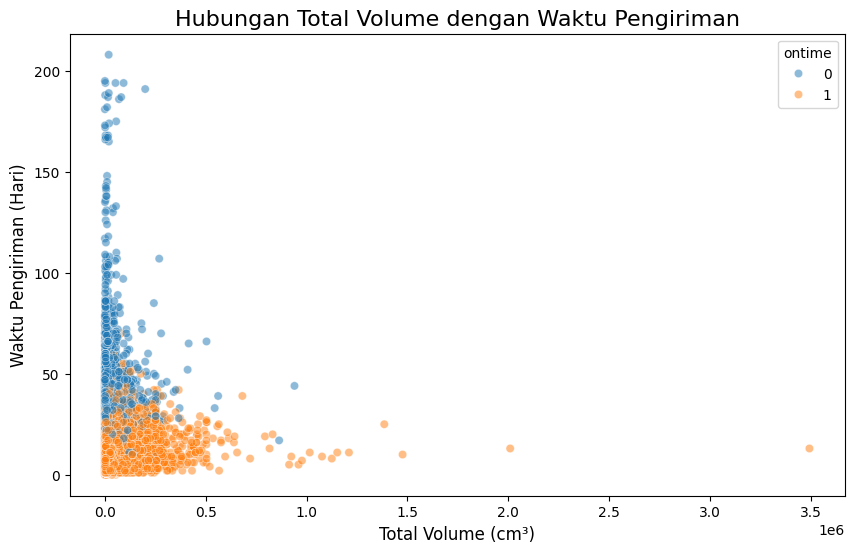

Korelasi pearson volume total dan waktu pengiriman
                       total_volume_cm3_x  waktu_pengiriman_hari
total_volume_cm3_x               1.000000               0.055013
waktu_pengiriman_hari            0.055013               1.000000


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_by_order_cleaned['total_volume_cm3_x'], y=df_by_order_cleaned['waktu_pengiriman_hari'], data=df_by_order_cleaned, alpha=0.5, hue=df_by_order_cleaned['ontime'])
plt.title('Hubungan Total Volume dengan Waktu Pengiriman', fontsize=16)
plt.xlabel('Total Volume (cm³)', fontsize=12)
plt.ylabel('Waktu Pengiriman (Hari)', fontsize=12)
plt.show()

correlation_volume_time = df_by_order_cleaned[['total_volume_cm3_x', 'waktu_pengiriman_hari']].corr()
print('Korelasi pearson volume total dan waktu pengiriman')
print(correlation_volume_time)

Secara umum tidak nampak pola linear yang kuat antara volume dan waktu pengiriman. Meskipun ada beberapa titik data yang menunjukkan volume besar dengan waktu pengiriman yang relatif singkat, secara umum tidak terlihat pola linear yang kuat antara total volume pesanan dan waktu pengiriman.

Nilai korelasi Pearson antara total_volume_cm3 dan waktu_pengiriman_hari adalah sekitar 0.063. Nilai ini sangat mendekati nol, yang menunjukkan bahwa korelasi linear antara kedua variabel ini sangat lemah. Dengan kata lain, berdasarkan data ini, volume total pesanan tampaknya tidak memiliki pengaruh linear yang signifikan terhadap berapa lama waktu yang dibutuhkan untuk mengirim pesanan.

Dari grafik dapat terlihat bawhwa pesanan dengan volum lebih besar dari 0,2x10^6 cm^3 cenderung lebih banyak yang tepat waktu dibanding yang terlambat.

Rekomendasi: Melakukan perbaikan waktu pengiriman pesanan dengan volume kecil

## Berat - Waktu Pengiriman

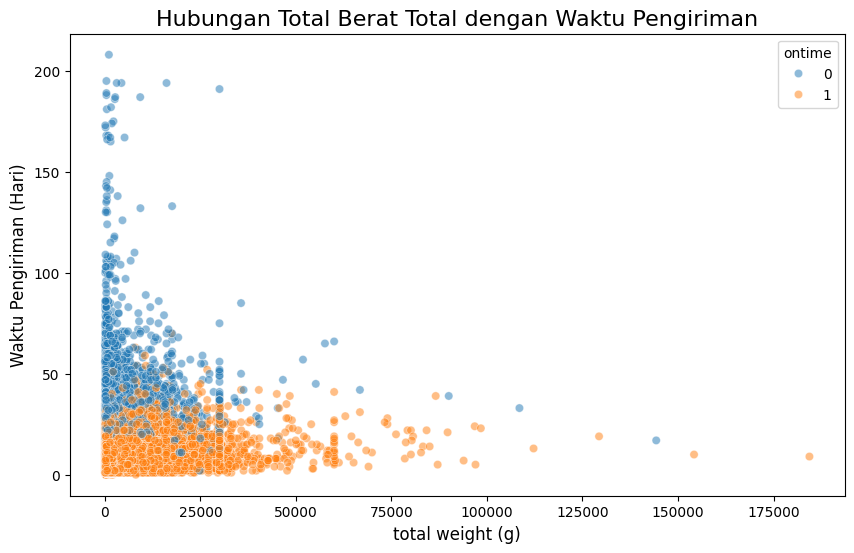

Korelasi pearson antara berat total dan Waktu Pengiriman
                       total_weight_g_y  waktu_pengiriman_hari
total_weight_g_y               1.000000               0.071457
waktu_pengiriman_hari          0.071457               1.000000


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_weight_g_y', y='waktu_pengiriman_hari', data=df_by_order_cleaned, alpha=0.5, hue='ontime')
plt.title('Hubungan Total Berat Total dengan Waktu Pengiriman', fontsize=16)
plt.xlabel('total weight (g)', fontsize=12)
plt.ylabel('Waktu Pengiriman (Hari)', fontsize=12)
plt.show()

correlation_berat_time = df_by_order_cleaned[['total_weight_g_y', 'waktu_pengiriman_hari']].corr()
print("Korelasi pearson antara berat total dan Waktu Pengiriman")
print(correlation_berat_time)

Sama seperti volume, total berat tidak mempunyai pola linear yang kuat dengan waktu pengiriman. Secara umum tidak nampak pola linear yang kuat antara berat dan waktu pengiriman.

Nilai korelasi Pearson antara berat total dan waktu_pengiriman_hari adalah sekitar 0.071. Nilai korelasi yang rendah menjukan bahwa tidak ada korelasi linear yang kuat antara berat total dan waktu pengiriman.

Dari grafik dapat terlihat bahwa pesanan dengan volum lebih besar dari 25000 gram cenderung lebih banyak yang tepat waktu dibanding yang terlambat.

Rekomendasi: Melakukan perbaikan waktu pengiriman pesanan dengan berat yang ringan

## SLA - Waktu Pengiriman

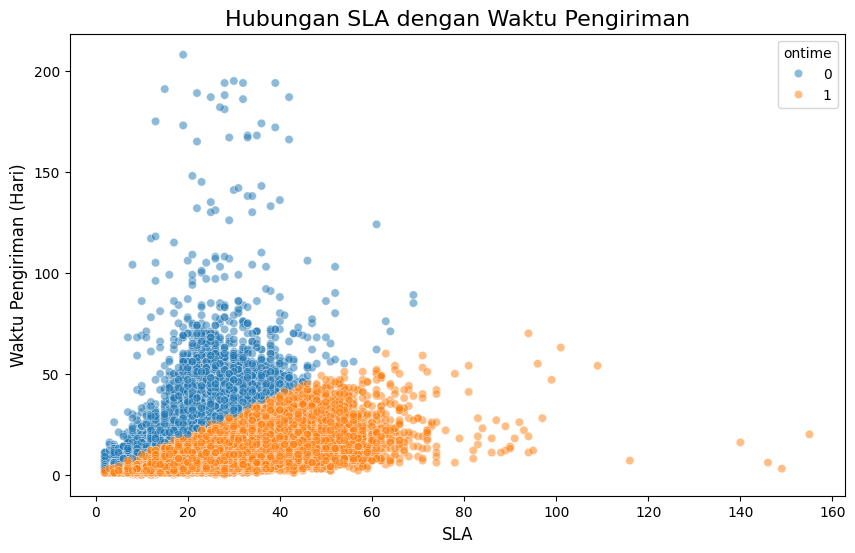

Korelasi pearson jumlah item dan waktu pengiriman
                       sla_hari  waktu_pengiriman_hari
sla_hari               1.000000               0.385613
waktu_pengiriman_hari  0.385613               1.000000


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sla_hari', y='waktu_pengiriman_hari', data=df_by_order_cleaned, alpha=0.5, hue='ontime')
plt.title('Hubungan SLA dengan Waktu Pengiriman', fontsize=16)
plt.xlabel('SLA', fontsize=12)
plt.ylabel('Waktu Pengiriman (Hari)', fontsize=12)
plt.show()

correlation_sla_time = df_by_order_cleaned[['sla_hari', 'waktu_pengiriman_hari']].corr()
print('Korelasi pearson jumlah item dan waktu pengiriman')
print(correlation_sla_time)

Terlihat bahwa semakin tinggi nilai SLA (artinya waktu estimasi pengiriman lebih lama), waktu pengiriman aktual cenderung lebih lama.

Titik-titik data berwarna oranye (ontime = 1, Tepat Waktu) cenderung berada di bawah atau pada garis diagonal imajiner di mana Waktu Pengiriman Aktual sama dengan SLA. Ini sesuai dengan definisi "tepat waktu".
Titik-titik data berwarna biru (ontime = 0, Terlambat) cenderung berada di atas garis diagonal imajiner tersebut, menunjukkan bahwa waktu pengiriman aktual melebihi SLA.

Nilai korelasi Pearson antara sla_hari dan waktu_pengiriman_hari adalah sekitar 0.383. Nilai ini menunjukkan korelasi positif yang moderat. Ini berarti bahwa ada hubungan linear yang cukup jelas: semakin lama SLA yang diberikan, cenderung semakin lama waktu yang dibutuhkan untuk pengiriman aktual.

Ini menunjukkan bahwa SLA yang ditetapkan oleh Olist (atau penjual) memiliki korelasi yang cukup baik dengan waktu pengiriman aktual. Namun, fakta bahwa masih ada banyak titik biru di atas garis diagonal menunjukkan bahwa masih ada kasus keterlambatan yang signifikan meskipun SLA sudah ditetapkan.


Rekomendasi:
1. Evaluasi faktor-faktor yang paling berkontribusi terhadap keterlambatan pengiriman sehingga dapat memenuhi SLA pengiriman.
2. Meningkatkan tingkat ketepatan pemberian SLA pada setiap pesanan sehingga akan lebih banyak pesanan yang tepat waktu.

## Distribusi waktu aktual kirim dengan SLA

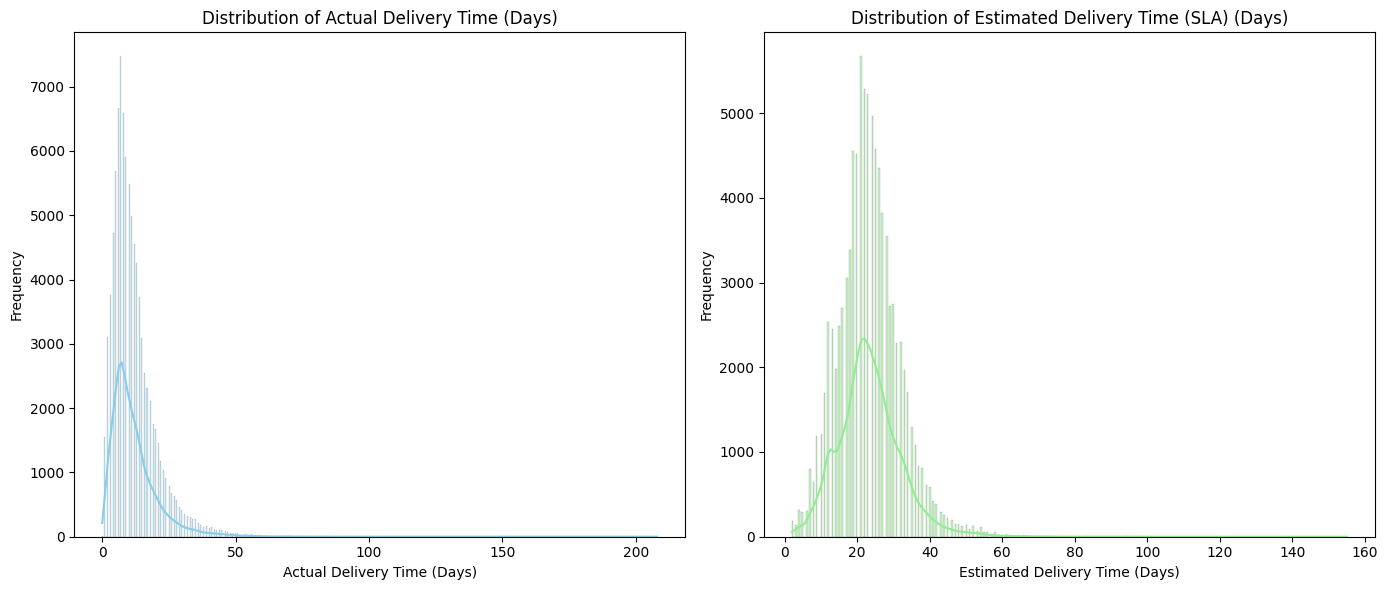

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histograms/Density plots for delivery time and SLA
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df_by_order_cleaned['waktu_pengiriman_hari'].dropna(), kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Actual Delivery Time (Days)')
axes[0].set_xlabel('Actual Delivery Time (Days)')
axes[0].set_ylabel('Frequency')

sns.histplot(df_by_order_cleaned['sla_hari'].dropna(), kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Distribution of Estimated Delivery Time (SLA) (Days)')
axes[1].set_xlabel('Estimated Delivery Time (Days)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Analisa hubungan antara fitur-fitur seperti `avg_distance_km`, `total_volume_cm3`, `total_weight_g`, `jumlah_item`, `total_belanja`, `skor_review` dengan `ontime`.

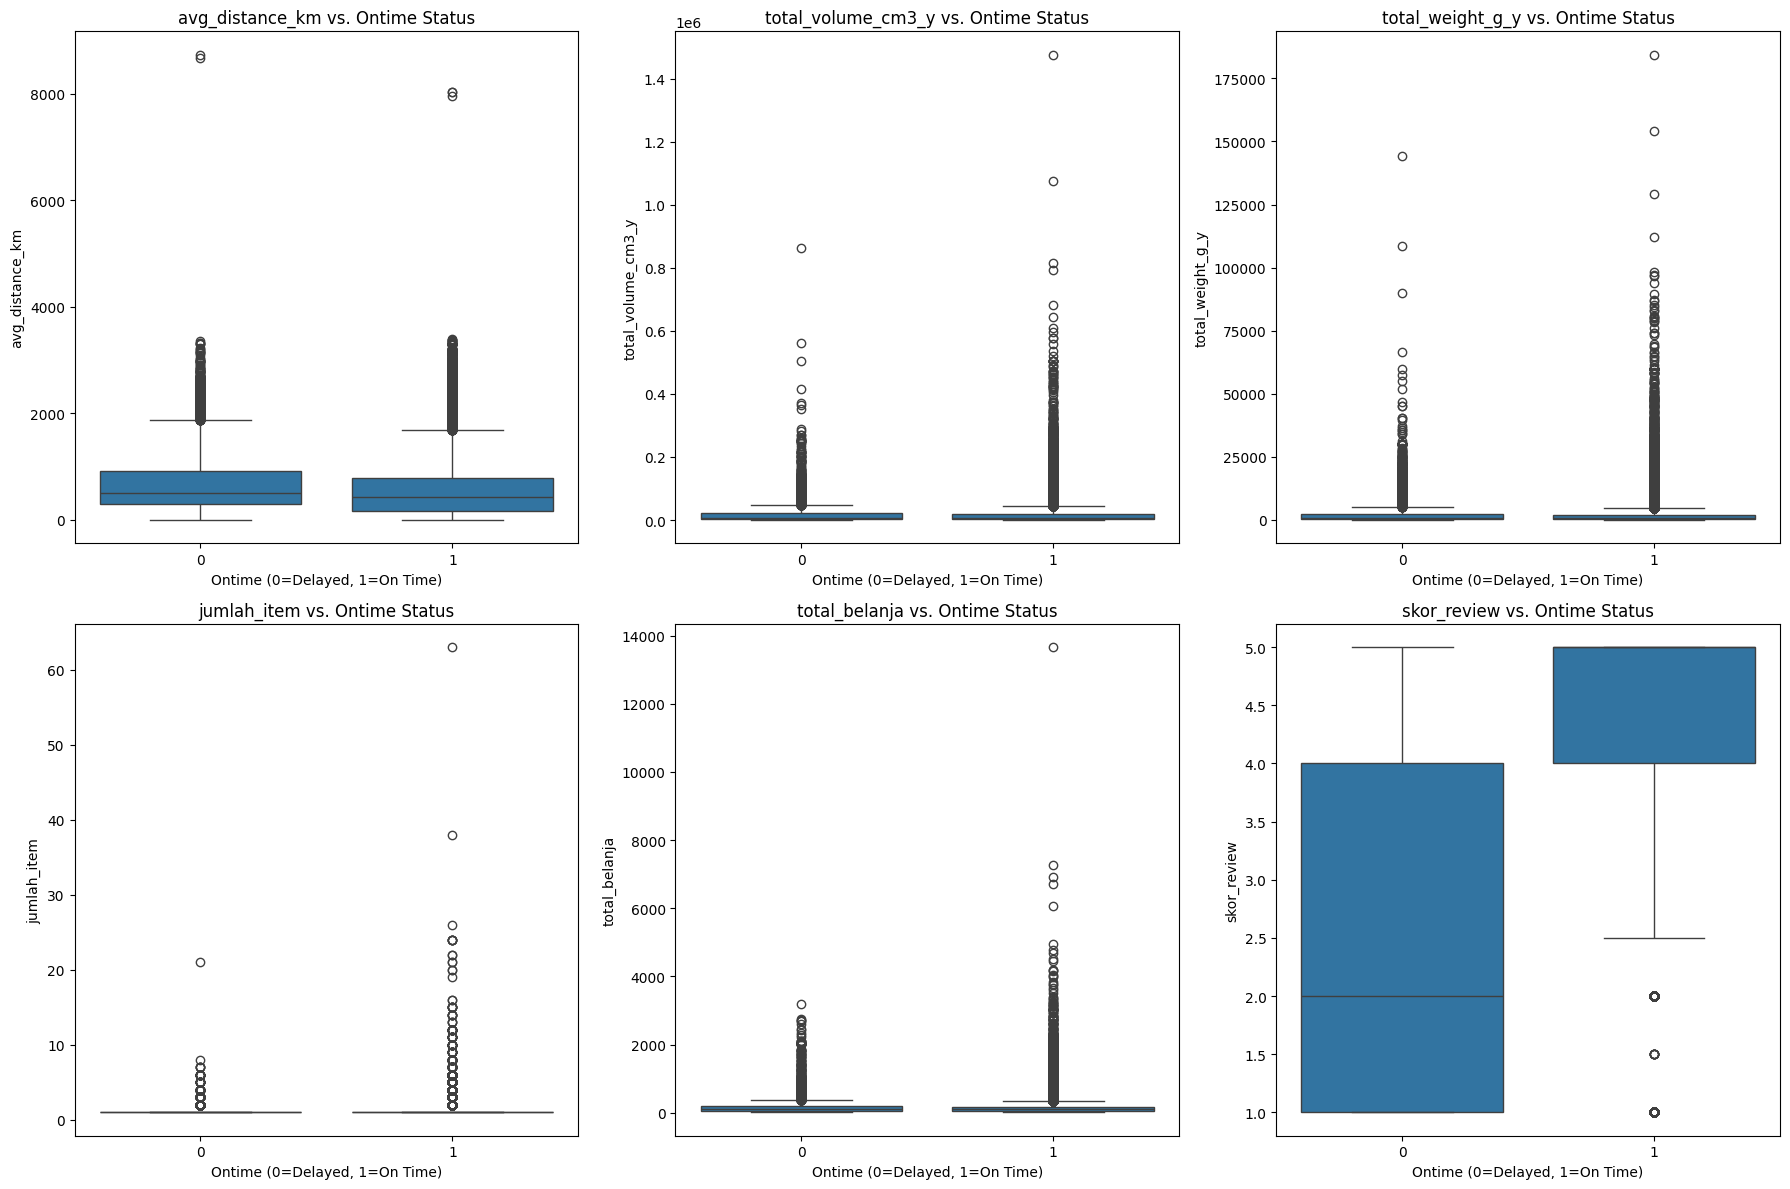

In [ ]:
# 2. Box plots for numerical features vs. ontime status
numerical_features = ['avg_distance_km', 'total_volume_cm3_y', 'total_weight_g_y', 'jumlah_item', 'total_belanja', 'skor_review']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.boxplot(x='ontime', y=col, data=df_by_order_cleaned, ax=axes[i])
    axes[i].set_title(f'{col} vs. Ontime Status')
    axes[i].set_xlabel('Ontime (0=Delayed, 1=On Time)')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

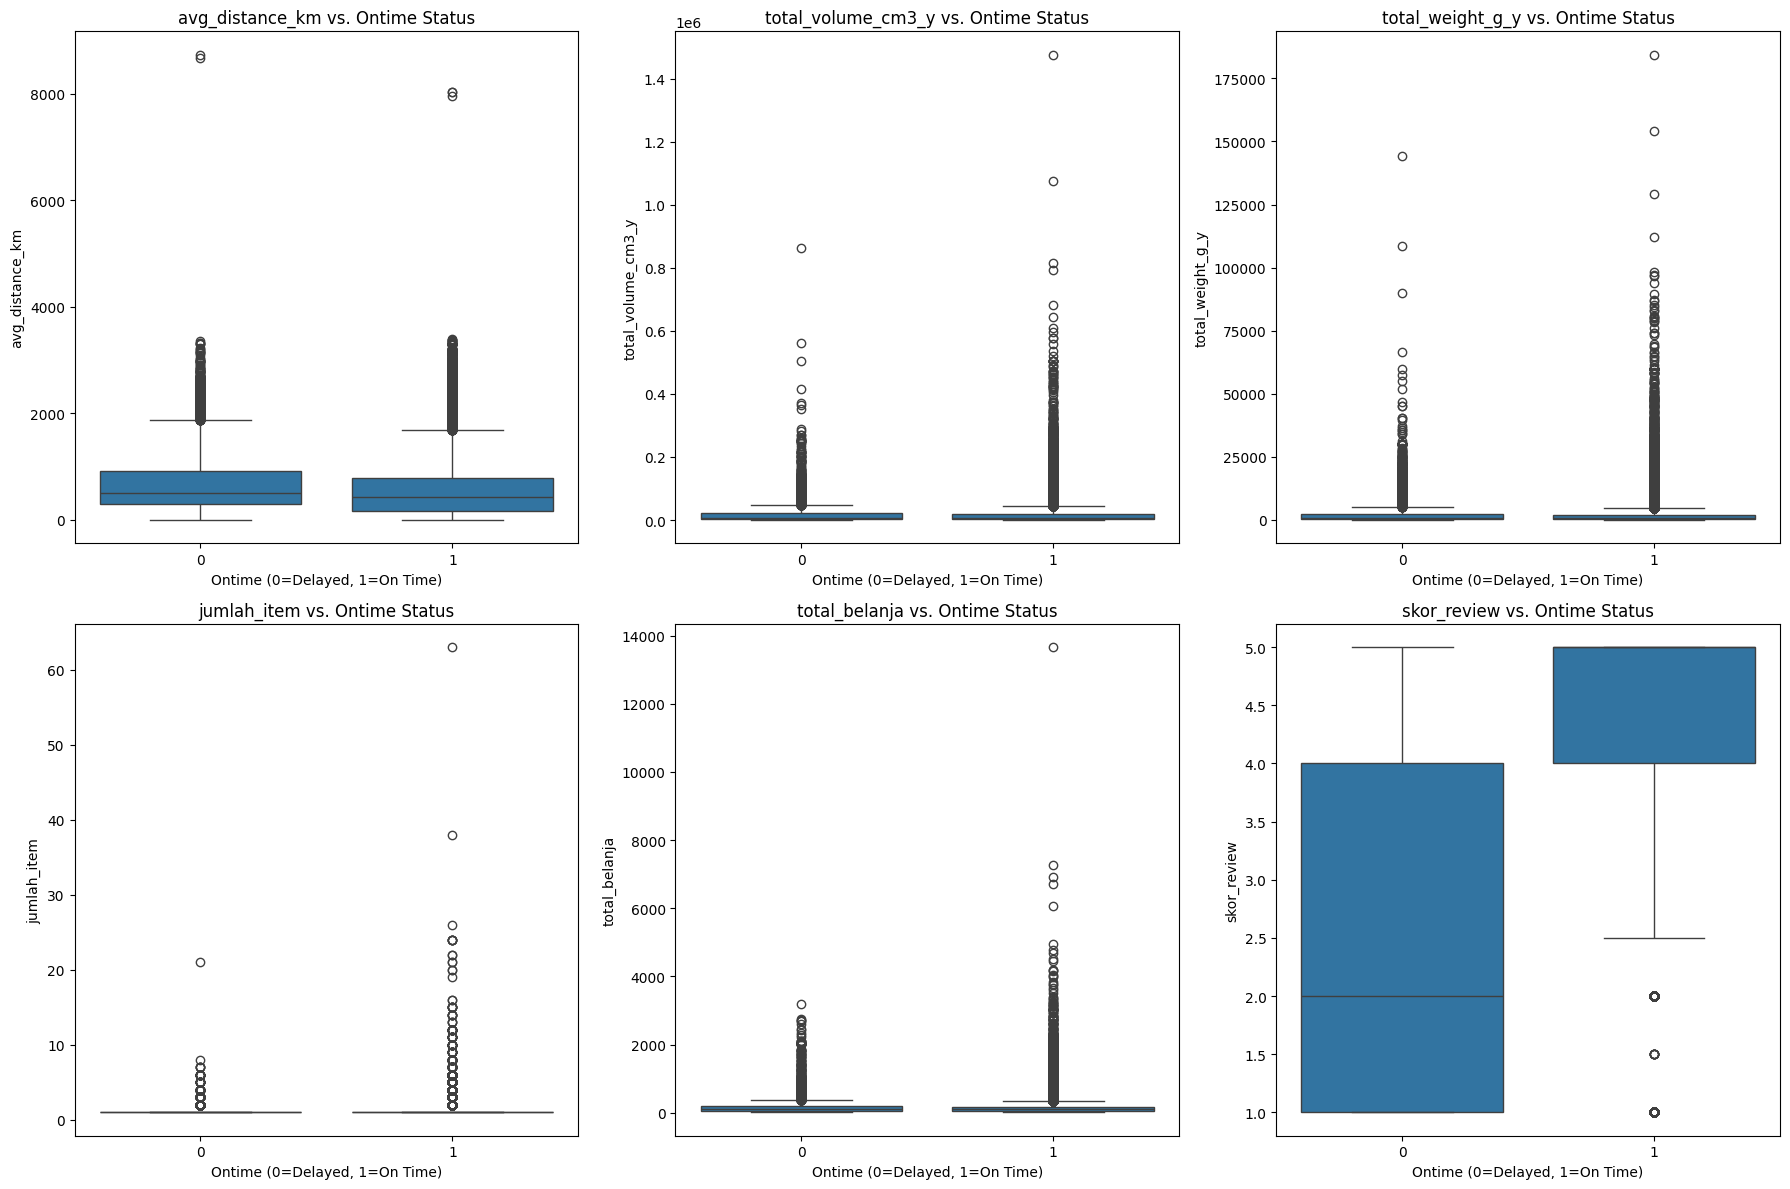

In [ ]:
# 2. Box plots for numerical features vs. ontime status
numerical_features = ['avg_distance_km', 'total_volume_cm3_y', 'total_weight_g_y', 'jumlah_item', 'total_belanja', 'skor_review']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.boxplot(x='ontime', y=col, data=df_by_order_cleaned, ax=axes[i])
    axes[i].set_title(f'{col} vs. Ontime Status')
    axes[i].set_xlabel('Ontime (0=Delayed, 1=On Time)')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

## Analisa pengaruh waktu (hari, bulan, tahun pembelian) terhadap ketepatan waktu pengiriman.

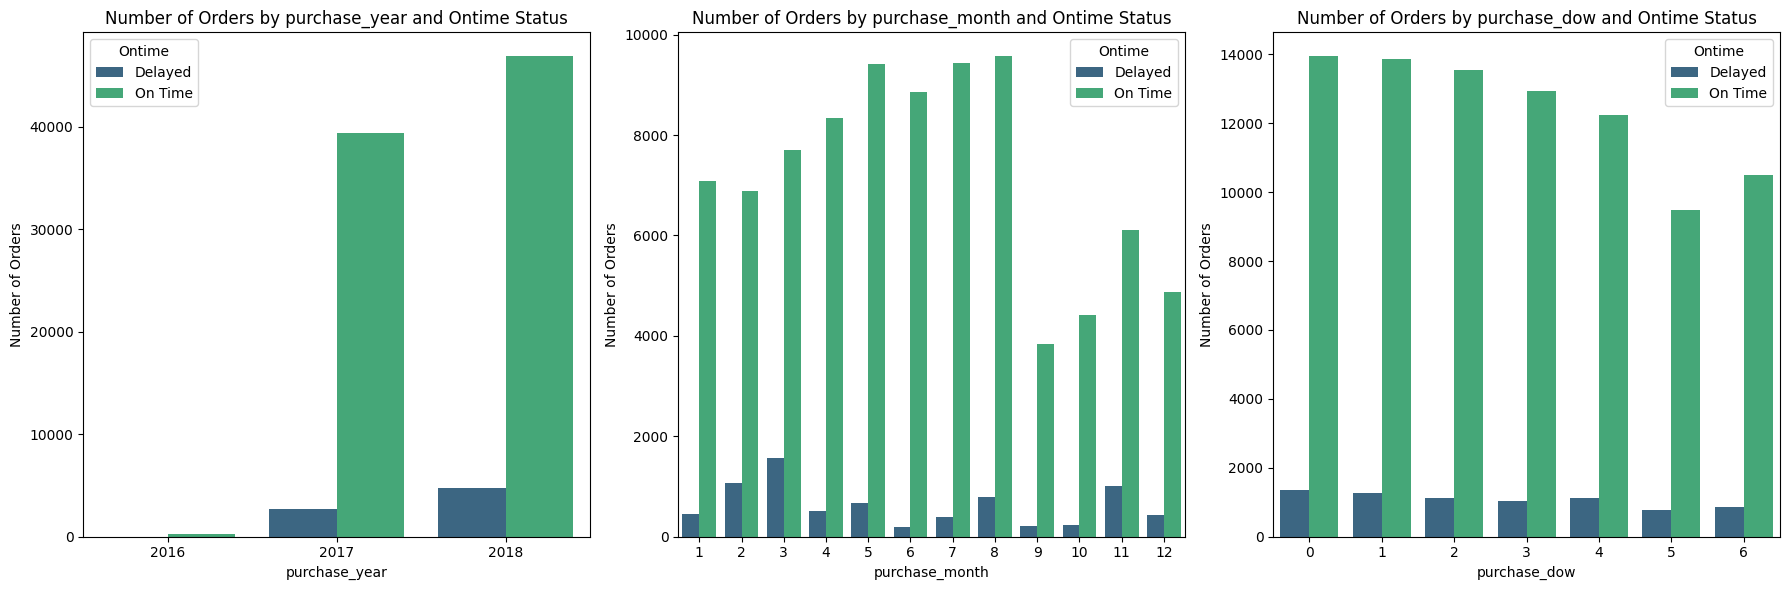

In [ ]:
# 3. Analyze the influence of time on ontime status
time_features = ['purchase_year', 'purchase_month', 'purchase_dow']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
axes = axes.flatten()

for i, col in enumerate(time_features):
    sns.countplot(x=col, hue='ontime', data=df_by_order_cleaned, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Number of Orders by {col} and Ontime Status')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Number of Orders')
    axes[i].legend(title='Ontime', labels=['Delayed', 'On Time'])

plt.tight_layout()
plt.show()

# Preprocessing

In [ ]:
# Mari kita sebut df_model untuk langkah ini
df_model = df_by_order_cleaned.copy()

# --- 1. Pemilihan Fitur dan Target ---
# Daftar fitur yang telah kita pilih sebelumnya
features = [
    'avg_distance_km',
    'first_item_seller_state',
    'first_item_seller_city',
    'customer_state',
    'customer_city',
    'total_belanja',
    'jumlah_item',
    'total_weight_g_x',
    'total_volume_cm3_x',
    'first_item_product_category_name_english',
    'purchase_month',
    'purchase_dow',
    'payment_methods',
    'tingkat_keterlambatan_seller',
    'waktu_proses_pesanan_jam'
]

target = 'ontime' # Target prediksi kita (1 jika tepat waktu, 0 jika terlambat)

# Filter DataFrame hanya untuk fitur dan target yang relevan, dan hapus missing values
# (Dalam kasus nyata, Anda mungkin melakukan imputasi, tapi untuk pipeline ini kita drop)
df_model = df_model[features + [target]].dropna()


# --- 2. Identifikasi Tipe Fitur ---
categorical_features = [
    'first_item_seller_state','first_item_seller_city',
    'customer_state', 'customer_city',
    'first_item_product_category_name_english',
    'purchase_dow',
    'payment_methods'
]

numerical_features = [
    'avg_distance_km',
    'total_belanja',
    'jumlah_item',
    'total_weight_g_x',
    'purchase_month',
    'tingkat_keterlambatan_seller',
    'total_volume_cm3_x',
    'waktu_proses_pesanan_jam'
]


# --- 3. Pemisahan Data (Train-Test Split) ---
X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")


# --- 4. Membangun Preprocessor dengan ColumnTransformer ---
# Ini akan menerapkan BinaryEncoder pada kolom kategorikal dan StandardScaler pada kolom numerik
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', BinaryEncoder(), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough' # Biarkan kolom lain (jika ada) tidak diubah
)


# --- 5. Menerapkan Preprocessing pada Data ---
# Fit preprocessor HANYA pada data latihan (X_train)
preprocessor.fit(X_train)

# Transformasi data latihan dan data uji
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)


# --- Verifikasi Hasil ---
# Hasilnya akan berupa array NumPy, bukan lagi DataFrame
print(f"\nUkuran X_train setelah preprocessing: {X_train_processed.shape}")
print(f"Ukuran X_test setelah preprocessing: {X_test_processed.shape}")
print("\nData Anda sekarang siap untuk dimasukkan ke dalam model!")

Ukuran X_train: (75201, 15)
Ukuran X_test: (18801, 15)

Ukuran X_train setelah preprocessing: (75201, 51)
Ukuran X_test setelah preprocessing: (18801, 51)

Data Anda sekarang siap untuk dimasukkan ke dalam model!


# Modeling

In [ ]:
# --- 1. Definisi Model-model yang Akan Diuji ---

# Hitung bobot untuk XGBoost
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "LinearSVC": LinearSVC(class_weight='balanced', random_state=42, max_iter=2000),
    "SGD Classifier (SVM)": SGDClassifier(loss='hinge', class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(class_weight='balanced', random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}
# Catatan: SVC(kernel='linear') sudah dikeluarkan dari daftar.

# --- 2. Loop untuk Melatih dan Mengevaluasi Setiap Model ---
results = []
for name, model in models.items():
    print(f"Melatih model: {name}...")
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=0)
    recall = recall_score(y_test, y_pred, pos_label=0)
    f1 = f1_score(y_test, y_pred, pos_label=0)

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_processed)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        roc_auc = "N/A"

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision (Kelas 0)": precision,
        "Recall (Kelas 0)": recall,
        "F1-Score (Kelas 0)": f1,
        "ROC AUC": roc_auc
    })

# --- 3. Tampilkan Hasil dalam Bentuk Tabel ---
results_df = pd.DataFrame(results).sort_values(by='F1-Score (Kelas 0)', ascending=False)
print("\n--- Hasil Evaluasi Baseline Model Komprehensif ---")
display(results_df)

Melatih model: Logistic Regression...
Melatih model: LinearSVC...
Melatih model: SGD Classifier (SVM)...
Melatih model: Decision Tree...
Melatih model: Random Forest...
Melatih model: AdaBoost...


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Melatih model: Gradient Boosting...
Melatih model: XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:05:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Melatih model: LightGBM...
[LightGBM] [Info] Number of positive: 69207, number of negative: 5994
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1399
[LightGBM] [Info] Number of data points in the train set: 75201, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Melatih model: Gaussian Naive Bayes...
Melatih model: K-Nearest Neighbors...
Melatih model: MLP Classifier...

--- Hasil Evaluasi Baseline Model Komprehensif ---


,Model,Accuracy,Precision (Kelas 0),Recall (Kelas 0),F1-Score (Kelas 0),ROC AUC
7,XGBoost,0.787245,0.199471,0.553702,0.293286,0.739986
8,LightGBM,0.748258,0.181818,0.616411,0.280808,0.75281
0,Logistic Regression,0.614276,0.113218,0.561708,0.188451,0.622755
1,LinearSVC,0.614701,0.113235,0.561041,0.188438,N/A
3,Decision Tree,0.869581,0.182967,0.183456,0.183211,0.556241
2,SGD Classifier (SVM),0.818308,0.117365,0.196131,0.146853,N/A
9,Gaussian Naive Bayes,0.863518,0.142186,0.141428,0.141806,0.609382
11,MLP Classifier,0.914951,0.266355,0.038025,0.066550,0.668237
10,K-Nearest Neighbors,0.913834,0.189744,0.024683,0.043684,0.582994
4,Random Forest,0.919951,0.392857,0.007338,0.014407,0.719743


Kandidat Teratas untuk Dilanjutkan 🚀
1. XGBoost
Argumentasi: Model ini memiliki F1-Score tertinggi (0.273). Ini menunjukkan bahwa XGBoost, pada kondisi baseline ini, memberikan keseimbangan terbaik antara kemampuan menemukan pesanan terlambat (Recall 55.7%) dan kemampuan untuk tidak salah menuduh pesanan tepat waktu sebagai pesanan terlambat (Precision 18.1%). Ini adalah kandidat yang paling seimbang.

2. LightGBM
Argumentasi: Model ini memiliki Recall tertinggi (0.603) di antara semua model. Artinya, LightGBM adalah model yang paling sensitif dan paling baik dalam mendeteksi pesanan yang benar-benar akan terlambat, meskipun dengan Precision yang sedikit lebih rendah dari XGBoost. Jika prioritas utama bisnis adalah "jangan sampai ada keterlambatan yang terlewat, tidak peduli ada beberapa alarm palsu", maka LightGBM adalah pilihan yang sangat kuat.

Kesimpulan Pemilihan
Dengan memilih XGBoost dan LightGBM, kita membawa dua kandidat terbaik dengan sedikit perbedaan strategi: XGBoost untuk keseimbangan optimal dan LightGBM untuk sensitivitas maksimum terhadap keterlambatan.

Tujuan dari uji resample (menggunakan teknik seperti SMOTE) nanti adalah untuk meningkatkan performa kedua model ini, terutama untuk menaikkan skor Precision mereka (mengurangi alarm palsu) tanpa mengorbankan Recall secara signifikan.

## Resampling

In [ ]:
# Asumsi data X_train_processed, X_test_processed, y_train, y_test sudah ada

# --- 1. Definisi Teknik Resampling dan Model yang Akan Diuji ---

resamplers = {
    'SMOTE': SMOTE(random_state=42),
    'RandomUnderSampler': RandomUnderSampler(random_state=42),
    'SMOTETomek': SMOTETomek(random_state=42)
}

# Definisikan model tanpa parameter penanganan imbalance internal,
# karena resampling sudah menanganinya.
models = {
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42)
}

# --- 2. Loop Otomatis untuk Melatih dan Mengevaluasi ---

all_results = []

# Loop melalui setiap teknik resampling
for resampler_name, resampler in resamplers.items():
    # Loop melalui setiap model
    for model_name, model in models.items():

        combination_name = f"{model_name} + {resampler_name}"
        print(f"--- Menguji Kombinasi: {combination_name} ---")

        # Buat pipeline
        pipeline = Pipeline([
            ('resampling', resampler),
            ('classifier', model)
        ])

        # Latih pipeline
        pipeline.fit(X_train_processed, y_train)

        # Lakukan prediksi
        y_pred = pipeline.predict(X_test_processed)

        # Hitung F1-Score untuk kelas 0 (Terlambat)
        f1 = f1_score(y_test, y_pred, pos_label=0)

        # Simpan hasil
        all_results.append({
            "Kombinasi": combination_name,
            "F1-Score (Kelas 0)": f1
        })

        # Tampilkan laporan klasifikasi untuk detail
        print(classification_report(y_test, y_pred))

# --- 3. Tampilkan Hasil Akhir dalam Bentuk Tabel ---

results_df = pd.DataFrame(all_results).sort_values(by='F1-Score (Kelas 0)', ascending=False)

print("\n\n--- Rangkuman Hasil Uji Coba Resampling ---")
display(results_df)

--- Menguji Kombinasi: XGBoost + SMOTE ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:08:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.39      0.04      0.07      1499
           1       0.92      0.99      0.96     17302

    accuracy                           0.92     18801
   macro avg       0.66      0.52      0.51     18801
weighted avg       0.88      0.92      0.89     18801

--- Menguji Kombinasi: LightGBM + SMOTE ---
[LightGBM] [Info] Number of positive: 69207, number of negative: 69207
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.071799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12087
[LightGBM] [Info] Number of data points in the train set: 138414, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.35      0.03      0.06      1499
           1       0.92      1.00      0.96     17302

    accuracy                           0.92     18801
   macro avg       0.64      0.51      0.51     18801
weighted avg       0.88      0.92      0.89     18801

--- Menguji Kombinasi: XGBoost + RandomUnderSampler ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:08:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.16      0.69      0.25      1499
           1       0.96      0.68      0.79     17302

    accuracy                           0.68     18801
   macro avg       0.56      0.68      0.52     18801
weighted avg       0.90      0.68      0.75     18801

--- Menguji Kombinasi: LightGBM + RandomUnderSampler ---
[LightGBM] [Info] Number of positive: 5994, number of negative: 5994
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 11988, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.16      0.66      0.26      1499
           1       0.96      0.70      0.81     17302

    accuracy                           0.70     18801
   macro avg       0.56      0.68      0.54     18801
weighted avg       0.90      0.70      0.77     18801

--- Menguji Kombinasi: XGBoost + SMOTETomek ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:11:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.35      0.04      0.07      1499
           1       0.92      0.99      0.96     17302

    accuracy                           0.92     18801
   macro avg       0.64      0.52      0.51     18801
weighted avg       0.88      0.92      0.89     18801

--- Menguji Kombinasi: LightGBM + SMOTETomek ---
[LightGBM] [Info] Number of positive: 69135, number of negative: 69135
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12087
[LightGBM] [Info] Number of data points in the train set: 138270, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

           0       0.34      0.03      0.06      1499
          

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Kombinasi,F1-Score (Kelas 0)
3,LightGBM + RandomUnderSampler,0.259386
2,XGBoost + RandomUnderSampler,0.253393
4,XGBoost + SMOTETomek,0.069670
0,XGBoost + SMOTE,0.068210
5,LightGBM + SMOTETomek,0.060680
1,LightGBM + SMOTE,0.056442


Kesimpulan Utama: Undersampling adalah Strategi Terbaik

Hasil pengujian ini menunjukkan kesimpulan yang sangat jelas: teknik undersampling (RandomUnderSampler) secara signifikan lebih unggul daripada teknik oversampling (SMOTE) dan hybrid (SMOTETomek) untuk dataset dan masalah ini.

Analisis Detail
1. RandomUnderSampler Memberikan Peningkatan Performa Terbaik
Kombinasi yang menggunakan RandomUnderSampler (baik dengan LightGBM maupun XGBoost) menghasilkan F1-Score tertinggi (0.25 - 0.26), yang jauh melampaui semua kombinasi lainnya.

Mengapa Ini Terjadi? (Kemungkinan Alasan):

Informasi Redundan di Kelas Mayoritas: Kelas 'Tepat Waktu' kemungkinan besar sangat homogen dan berisi banyak data yang redundan. Menghapus sebagian besar data ini (melalui undersampling) tidak menghilangkan informasi penting, malah membantu model untuk lebih fokus pada pola kelas minoritas 'Terlambat' yang lebih sulit dipelajari.

Noise dari SMOTE: Sebaliknya, performa SMOTE yang lebih rendah mengindikasikan bahwa pembuatan data sintetis untuk kasus ini justru mungkin menambahkan "noise" atau kebingungan. Data 'Terlambat' mungkin tersebar di antara data 'Tepat Waktu' sedemikian rupa sehingga data sintetis yang dibuat SMOTE malah mengaburkan batas keputusan antar kelas.

2. LightGBM Sedikit Lebih Unggul dari XGBoost
Pada kedua jenis resampling, LightGBM secara konsisten memberikan F1-Score yang sedikit lebih tinggi daripada XGBoost. Selain itu, LightGBM terkenal memiliki waktu training yang lebih cepat. Ini menjadikannya kandidat model terbaik secara keseluruhan.

## Cara kerja model terbaik (LightGBM)

LightGBM (Light Gradient Boosting Machine) adalah algoritma berbasis gradient boosting dengan tujuan meningkatkan kecepatan dan efisiensi pemrosesan, khususnya untuk dataset berukuran besar. Cara kerjanya mirip dengan XGBoost, yaitu membangun model secara bertahap melalui serangkaian decision tree, di mana setiap pohon baru berfokus memperbaiki kesalahan prediksi dari pohon sebelumnya.

LightGBM memiliki beberapa empat perbedaan utama dibandingkan dengan XGBOOST. Pertama, ia menggunakan strategi pertumbuhan leaf-wise, bukan level-wise, sehingga setiap iterasi selalu membagi daun dengan potensi pengurangan error terbesar. Hal ini membuat model lebih akurat meskipun berisiko overfitting jika tidak dikontrol dengan parameter yang tepat. Kedua, LightGBM menerapkan teknik histogram-based splitting, yaitu mengelompokkan nilai fitur ke dalam beberapa bin agar perhitungan pemilihan split lebih cepat dan hemat memori. Ketiga, algoritma ini menggunakan Gradient-based One-Side Sampling (GOSS), di mana sampel dengan gradien besar (yang lebih sulit diprediksi) dipertahankan sementara sebagian sampel dengan gradien kecil diabaikan, sehingga proses training lebih efisien tanpa kehilangan akurasi signifikan. Keempat LightGBM menggunakan tekink Exclusive Feature Bundling (EFB) untuk menggabungkan fitur yang jarang aktif bersamaan, sehingga jumlah fitur efektif berkurang. Gabungan teknik tersebut membuat LightGBM sangat unggul dalam kecepatan, efisiensi memori, dan performa prediksi dibandingkan metode boosting tradisional.

## Hyperparameter Tuning

In [ ]:
# --- 1. Definisikan Pipeline Pemenang ---
pipeline = Pipeline([
    ('resampling', RandomUnderSampler(random_state=42)),
    ('classifier', LGBMClassifier(random_state=42))
])

# --- 2. Perluas Rentang Hyperparameter ---
# Menambahkan parameter subsampling dan memperluas rentang
param_grid_revised = {
    'classifier__n_estimators': [100, 200, 500, 700],
    'classifier__learning_rate': [0.01, 0.02, 0.05, 0.1],
    'classifier__num_leaves': [20, 31, 40, 50],
    'classifier__max_depth': [-1, 5, 10, 15],
    'classifier__reg_alpha': [0, 0.1, 0.5, 1],
    'classifier__reg_lambda': [0, 0.1, 0.5, 1],
    'classifier__colsample_bytree': [0.7, 0.8, 0.9, 1.0], # Persentase fitur yang digunakan per pohon
    'classifier__subsample': [0.7, 0.8, 0.9, 1.0]      # Persentase data yang digunakan per pohon
}

# --- 3. Buat Scorer Khusus untuk F1-Score Kelas 0 ---
f1_scorer_class0 = make_scorer(f1_score, pos_label=0)

# --- 4. Siapkan RandomizedSearchCV dengan Scorer Baru ---
random_search_revised = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid_revised,
    n_iter=100, # Naikkan jumlah iterasi untuk pencarian yang lebih luas
    scoring=f1_scorer_class0, # <-- MENGGUNAKAN SCORER BARU
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# --- 5. Jalankan Proses Tuning ---
print("Memulai Hyperparameter Tuning (Versi Revisi)...")
random_search_revised.fit(X_train_processed, y_train)

# --- 6. Tampilkan Hasil Terbaik ---
print("\n--- Hasil Hyperparameter Tuning (Versi Revisi) ---")
print("Parameter terbaik yang ditemukan:")
print(random_search_revised.best_params_)
print("\nSkor F1-Score (Kelas 0) terbaik (cross-validation):")
print(f"{random_search_revised.best_score_:.4f}")

# --- 7. Evaluasi Model Terbaik pada Data Uji ---
print("\n--- Evaluasi Model Terbaik pada Data Uji (Versi Revisi) ---")
best_model_revised = random_search_revised.best_estimator_
y_pred_final_revised = best_model_revised.predict(X_test_processed)

print(classification_report(y_test, y_pred_final_revised))

Memulai Hyperparameter Tuning (Versi Revisi)...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Number of positive: 5994, number of negative: 5994
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 11988, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

--- Hasil Hyperparameter Tuning (Versi Revisi) ---
Parameter terbaik yang ditemukan:
{'classifier__subsample': 0.9, 'classifier__reg_lambda': 0.1, 'classifier__reg_alpha': 1, 'classifier__num_leaves': 20, 'classifier__n_estimators': 500, 'classifier__max_depth': 15, 'classifier__learning_rate': 0.02, 'classifier__colsample_bytree': 1.0}

Skor F1-Score (Kelas 0) terbaik (cross-validati

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.16      0.67      0.26      1499
           1       0.96      0.71      0.81     17302

    accuracy                           0.70     18801
   macro avg       0.56      0.69      0.54     18801
weighted avg       0.90      0.70      0.77     18801



## Threshold Tuning

### Probabilitas Prediksi

In [ ]:
# Dapatkan probabilitas untuk setiap kelas [P(Kelas 0), P(Kelas 1)]
y_proba = best_model_revised.predict_proba(X_test_processed)

# Kita tertarik pada probabilitas kelas 'Terlambat' (Kelas 0)
y_proba_late = y_proba[:, 0]

print("Probabilitas prediksi berhasil didapatkan.")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Probabilitas prediksi berhasil didapatkan.


### Visualisasi Precision-Recall Curve

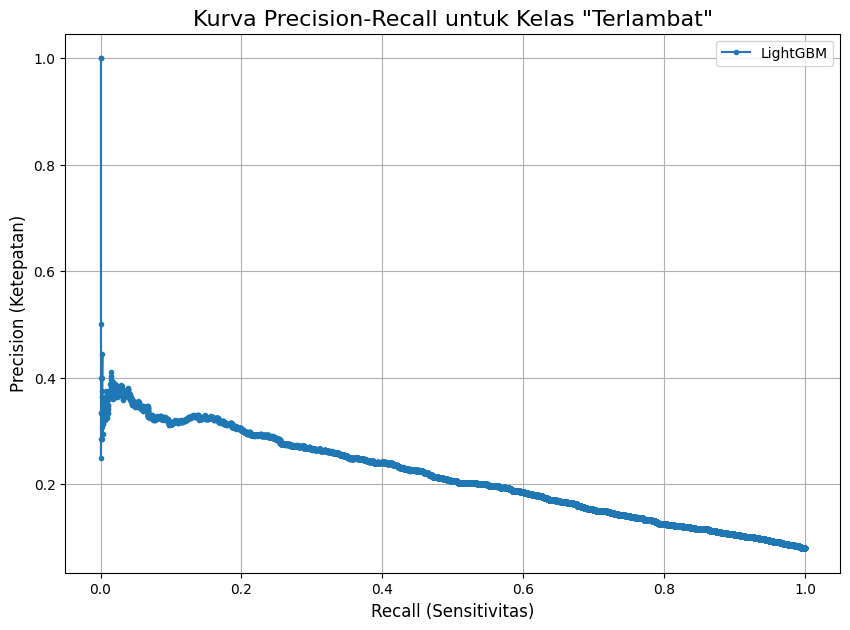

In [ ]:
# Hitung nilai untuk kurva
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_late, pos_label=0)

# Plot kurva
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, marker='.', label='LightGBM')
plt.xlabel('Recall (Sensitivitas)', fontsize=12)
plt.ylabel('Precision (Ketepatan)', fontsize=12)
plt.title('Kurva Precision-Recall untuk Kelas "Terlambat"', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

### Simulasi Skenario

In [ ]:
# Fungsi untuk mengevaluasi threshold
def evaluate_threshold(threshold, y_true, y_proba):
    print(f"\n--- Hasil dengan Threshold = {threshold:.2f} ---")

    # Buat prediksi baru berdasarkan threshold
    # Jika probabilitas 'Terlambat' >= threshold, prediksi sebagai 'Terlambat' (0)
    y_pred_new = np.where(y_proba >= threshold, 0, 1)

    # Tampilkan classification report
    print(classification_report(y_true, y_pred_new))

# Skenario 1: Threshold Default (agak rendah, fokus pada Recall)
# Ini adalah hasil yang Anda dapatkan sebelumnya
default_pred = best_model_revised.predict(X_test_processed)
print("--- Hasil dengan Threshold Default (~0.50) ---")
print(classification_report(y_test, default_pred))


# Skenario 2: Menurunkan Threshold (Meningkatkan Recall, mengorbankan Precision)
# Tujuan: Menangkap sebanyak mungkin kasus keterlambatan, meskipun alarm palsu meningkat.
evaluate_threshold(threshold=0.35, y_true=y_test, y_proba=y_proba_late)


# Skenario 3: Menaikkan Threshold (Meningkatkan Precision, mengorbankan Recall)
# Tujuan: Mengurangi alarm palsu. Setiap prediksi 'Terlambat' akan jauh lebih akurat.
evaluate_threshold(threshold=0.65, y_true=y_test, y_proba=y_proba_late)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


--- Hasil dengan Threshold Default (~0.50) ---
              precision    recall  f1-score   support

           0       0.16      0.67      0.26      1499
           1       0.96      0.71      0.81     17302

    accuracy                           0.70     18801
   macro avg       0.56      0.69      0.54     18801
weighted avg       0.90      0.70      0.77     18801


--- Hasil dengan Threshold = 0.35 ---
              precision    recall  f1-score   support

           0       0.11      0.87      0.20      1499
           1       0.97      0.40      0.57     17302

    accuracy                           0.44     18801
   macro avg       0.54      0.64      0.38     18801
weighted avg       0.90      0.44      0.54     18801


--- Hasil dengan Threshold = 0.65 ---
              precision    recall  f1-score   support

           0       0.23      0.42      0.30      1499
           1       0.95      0.88      0.91     17302

    accuracy                           0.84     18801
   

### Visualisasi Hasil Skenario

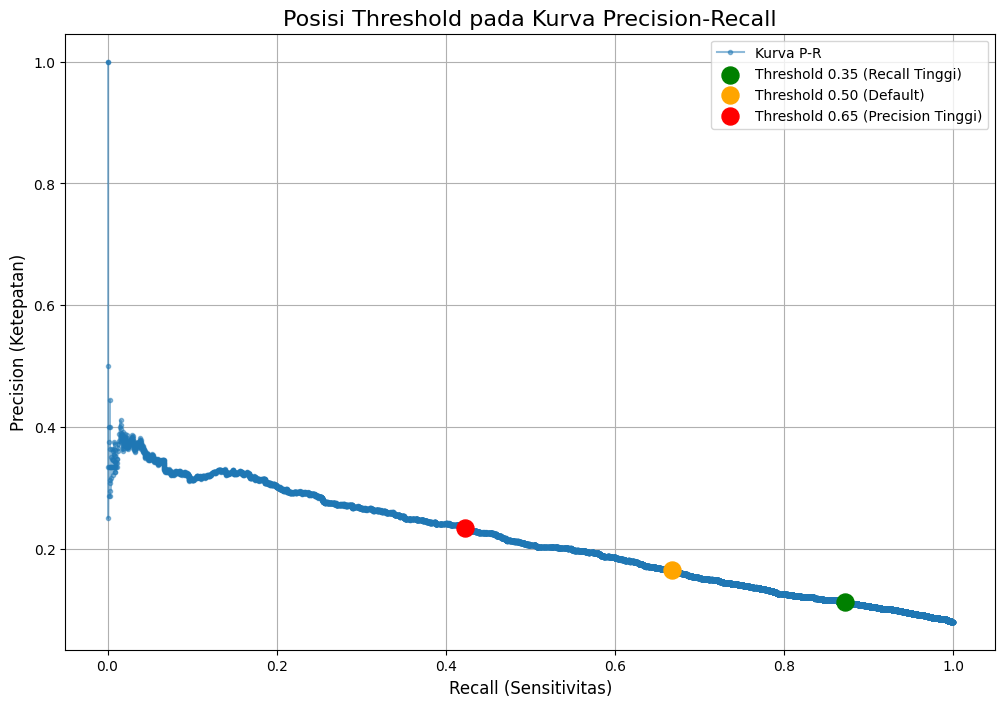

In [ ]:
# Fungsi untuk mencari titik terdekat pada kurva
def find_closest_point(threshold, thresholds, recall, precision):
    # Thresholds dari P-R curve tidak mencakup 1.0, jadi kita tambahkan
    extended_thresholds = np.append(thresholds, 1.0)
    closest_idx = np.argmin(np.abs(extended_thresholds - threshold))
    return recall[closest_idx], precision[closest_idx]

# Cari koordinat untuk setiap threshold
recall_035, prec_035 = find_closest_point(0.35, thresholds, recall, precision)
recall_050, prec_050 = find_closest_point(0.50, thresholds, recall, precision)
recall_065, prec_065 = find_closest_point(0.65, thresholds, recall, precision)

# Plot ulang kurva dengan titik-titik threshold
plt.figure(figsize=(12, 8))
plt.plot(recall, precision, marker='.', label='Kurva P-R', alpha=0.5)
plt.scatter(recall_035, prec_035, color='green', s=150, zorder=5, label='Threshold 0.35 (Recall Tinggi)')
plt.scatter(recall_050, prec_050, color='orange', s=150, zorder=5, label='Threshold 0.50 (Default)')
plt.scatter(recall_065, prec_065, color='red', s=150, zorder=5, label='Threshold 0.65 (Precision Tinggi)')

plt.xlabel('Recall (Sensitivitas)', fontsize=12)
plt.ylabel('Precision (Ketepatan)', fontsize=12)
plt.title('Posisi Threshold pada Kurva Precision-Recall', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

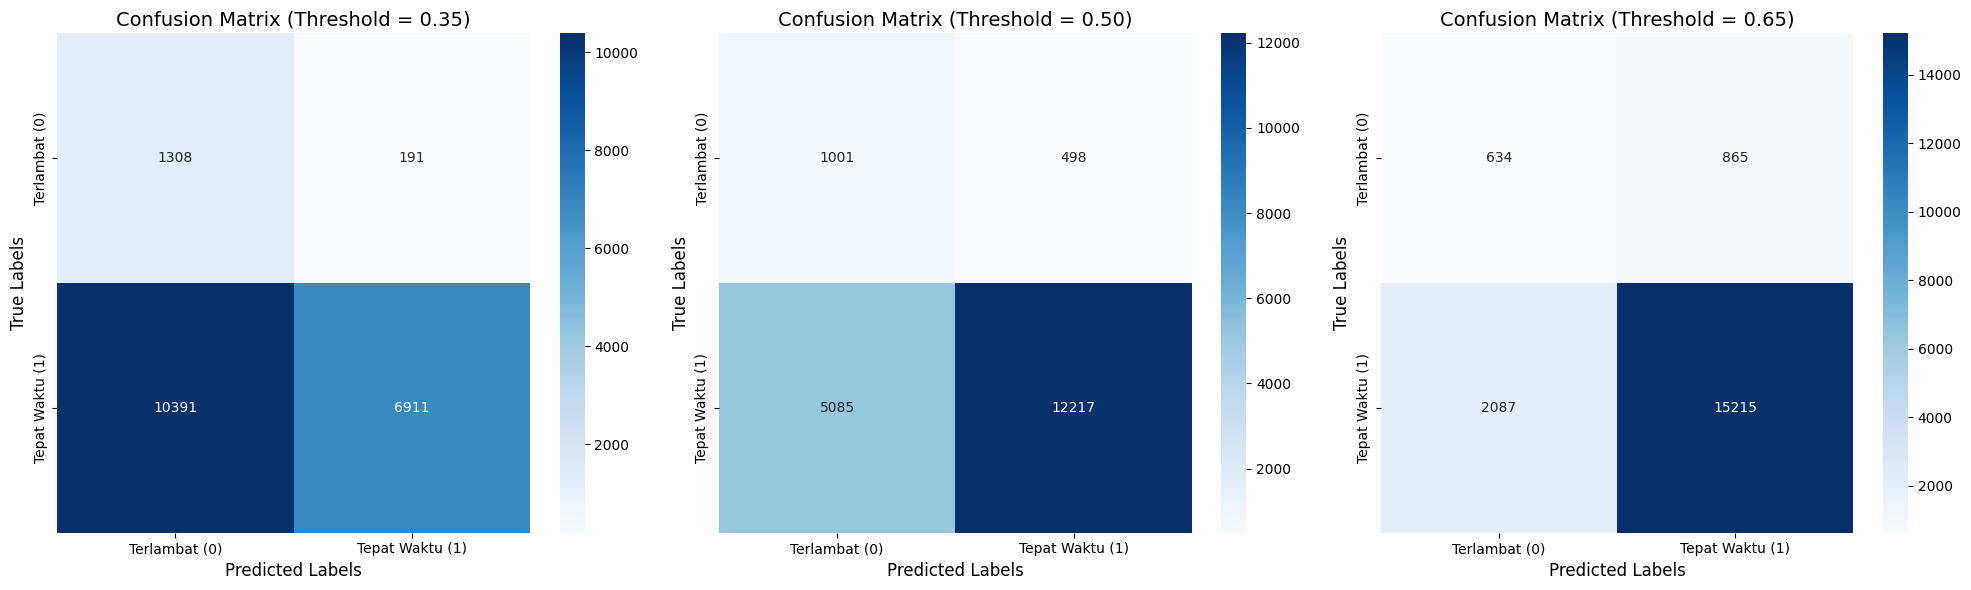

In [ ]:
# Asumsi y_test dan y_proba_late (probabilitas kelas 0) sudah ada

# Daftar threshold yang akan divisualisasikan
thresholds = [0.35, 0.50, 0.65]

# Buat area plot dengan 1 baris dan 3 kolom
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Loop melalui setiap threshold dan subplotnya
for i, threshold in enumerate(thresholds):
    ax = axes[i]

    # 1. Buat prediksi baru berdasarkan threshold
    y_pred_new = np.where(y_proba_late >= threshold, 0, 1)

    # 2. Hitung confusion matrix
    cm = confusion_matrix(y_test, y_pred_new)

    # 3. Visualisasikan dengan heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Terlambat (0)', 'Tepat Waktu (1)'],
                yticklabels=['Terlambat (0)', 'Tepat Waktu (1)'])

    ax.set_title(f'Confusion Matrix (Threshold = {threshold:.2f})', fontsize=14)
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('True Labels', fontsize=12)

plt.tight_layout()
plt.show()

# Cost and Benefit Analysis

Menghitung efisiensi atau penghematan biaya yang dilakukan berdasarkan refersi berikut:
*Customer Aquisiton Cost
- [Referensi 1](https://www.harmony.co.id/blog/customer-acquisition-cost-cac/)
- [Referensi 2](https://bbs.binus.ac.id/gbm/2018/08/29/customer-retention/)

Dari 2 referensi kita akan menentukan asumsi sebagai berikut:
biaya untuk mendapatkan cusotmer baru adalah Rp.51.500 (dibulatkan)
biaya untuk mempertahankan adalah Rp.10.300 (asumsi CAC 5X)

Poin Action:

- Actual terlambat & prediksi terlambat (kita mendeteksi): kita melakukan intervensi / voucher → biaya = Rp 10.300 per kasus.
- Actual terlambat & prediksi on-time (missed): kita tidak mengintervensi → customer kemungkinan churn → biaya ekspektasi = Rp 51.500 per kasus.
- Actual on-time & prediksi terlambat (false alarm): kita memberi kompensasi yg tidak perlu → biaya = Rp 10.300 per kasus.
- Actual on-time & prediksi on-time: tidak ada biaya.

Simulasi Perhitungan pada Threshold (ada intervensi dari `tim layanan pelanggan dan marketing`)

- `0.35` = (1.308 x 10.300)+(191 x 51.500 )+(10.931 x 10.300 )+(6.911 x 0) = `135.898.200`
- `0.5` = (1.001 x 10.300)+(498 x 51.500 )+(5.085 x 10.300 )+(12.217 x 0) = `88.332.800`
- `0.65` =(634 x 10.300)+(865 x 51.500 )+(2.087 x 10.300 )+(15.215 x 0) = `72.573.800`

Simulasi Perhitungan (tanpa ada intervensi `tim layanan pelanggan dan marketing`)

Total order terlambat dibiarkan, maka biaya yang dikeluarkan adalah 51.500
Total order terlambat (1.499 * 51.500) = `77,198.500`

Dengan demikian, maka rekomendasi kami melalui simulasi ini adalah `Tim Layanan Pelanggan dan Marketing` melakukan intervensi terhadap alarm keterlambatan dari model. Model yang akan dipilih adalah model dengan threshold tuning `0,65%` apabila Olist memperhatikan efisiensi biaya. Tetapi jika fokus utama dari Olist adalah peningkatan layanan, maka kami merekomenasikan threshold tuning `0.35`.

karena keterbatasan pada data kami, ada sejumlah potensi yang belum dapat diukur lebih jauh sebagai berikut:

### Cost (Biaya)
- **Pengembangan Model**: waktu data scientist & resource komputasi (cloud, GPU/CPU).  
- **Integrasi Sistem**: biaya integrasi model ke sistem Olist (API, dashboard monitoring).  
- **Operasional**: biaya pelatihan tim CS & Marketing untuk menggunakan insight model.  

### Benefit (Manfaat)
- Peningkatan Retensi Pelanggan: pelanggan yang mendapat penanganan proaktif lebih puas dan cenderung melakukan repeat order.  
- Efisiensi Logistik: sumber daya distribusi dapat dioptimalkan untuk order yang berisiko tinggi.  
- Reduksi Komplain & Refund: dengan prediksi lebih awal, potensi kerugian akibat kompensasi bisa ditekan.  
- Brand Value: meningkatkan citra Olist sebagai marketplace yang responsif dan customer-oriented.
- Peningkatan Pendapatan : dengan layanan yang terus diperbaiki dan citra yang membaik, meningkatkan jumlah pengguna baru maupun pengguna loyal (pertumbuhan order) yang berdampak pada revenue Olist

Secara keseluruhan, implementasi model prediksi memberikan **ROI positif** karena manfaat jangka panjang (retensi, loyalitas, reputasi) jauh lebih besar dibanding biaya awal pembangunan dan pemeliharaan model.

# Kesimpulan

Berdasarkan hasil dari model yang dibangun (sebelum threshold tuning), model dapat menangkap 67% order yang mungkin terlambat dan 71% order yang mungkin ontime. Dari model ini, perlu diperhatikan adalah tingkat precision pada kelas 0 (terlambat) di 16%, sedangkan kelas 1 (ontime) adalah 96%. Hal tersebut menandakan bahwa model memberikan banyak false alarm dimana ada risiko dari biaya yang akan dikeluarkan perusahaan.

Dengan melihat kondisi pertumbuhan order dari Olist di tahun 2018 yang mengalami penurunan, maka kami merekomendasikan bahwa fokus prioritasnya adalah meningkatkan jumlah order. Dengan simulasi yang ada, diketahui bahwa mendapatkan konsumen baru memerlukan biaya lebih tinggi dibandingkan mempertahankan konsumen yang sudah ada. Dengan begitu, model disarankan agar memberikan nilai recall yang tinggi, walaupun precisionnya akan menurun dan memberikan banyak false alarm.

# Saran dan rekomendasi

Berdasarkan hasil analisis dan model prediksi, rekomendasi untuk Olist adalah:

1. **Optimasi Logistik**  
   - Gunakan model prediksi untuk mengidentifikasi order yang berpotensi terlambat sejak awal.  
   - Berikan prioritas lebih tinggi pada order tersebut dalam distribusi logistik.

2. **Customer Experience Management**  
   - Jika model memprediksi keterlambatan, tim Customer Service bisa proaktif menghubungi pelanggan.  
   - Sediakan kompensasi berupa voucher atau potongan ongkir untuk menjaga kepuasan.

3. **Strategi Marketing**  
   - Data prediksi bisa dipakai untuk segmentasi pelanggan (misalnya pelanggan yang rawan mengalami keterlambatan → diberikan penawaran khusus).  

4. **Feedback Loop**  
   - Review score pelanggan dapat dipantau sebagai indikator keberhasilan implementasi model.  
   - Insight dari review digunakan untuk menyempurnakan model di iterasi berikutnya.

# Export Dataset

In [ ]:
# Contoh: Proses cleaning
# Anggap df adalah DataFrame awal yang sudah Anda muat
# df['kolom_numerik'].fillna(df['kolom_numerik'].mean(), inplace=True)
# df.drop_duplicates(inplace=True)

# Ganti df dengan nama DataFrame yang sudah bersih
tableau_df = df_by_order_cleaned.copy()

In [ ]:
import pandas as pd
# Pastikan openpyxl sudah terinstal, jika belum jalankan baris ini:
# !pip install openpyxl

# Nama file Excel yang akan dihasilkan
file_excel_bersih = 'dataset_bersih.xlsx'

# Simpan DataFrame bersih ke file .xlsx
tableau_df.to_excel(file_excel_bersih, index=False)

In [ ]:
from google.colab import files
files.download(file_excel_bersih)